# <div class="alert alert-block alert-info"> <span style="font-family: Times New Roman">Prediction of Insurance Price of an individual </span> </div>

### <div class="alert alert-block alert-success"> <span  style= "font-family: Times New Roman">**Objective:** Predict the insurance price of an individual from the given data  </span> </div>

<div class="warning" style='padding:0.1em; background-color:#70A0AF; color:#FFFFFF'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Important: </b></p>
<p style='margin-left:1em;'>
- The tasks are given to guide the flow, Few tasks can also be considered optional if there is no scope or need.<br>
- It is always encouraged to add your options to the list or flow as additional performance is always appreciated. <br>
- Not only the results but also Visualization, Inferences, Reasons, Probabilities & Implementations are equally important. <br>
- Please make sure the conclusions for the plots, results and summaries are mentioned in your own way. Add a natural comprehension to it thinking from a real time perspective. <br>
- Its always encouraged to make this process a way of conveying a story as engaging as possible. <br>
</p>
</span>
</div>

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Flow of Guided Project: </b></p>
<p style='margin-left:1em;'>
- There are certain tasks given here in order to understand and extract insights from the data. <br>
- Carefully, Go through each step and provide proper reasons and explanations for the assumptions and actions.  
</p>
</span>
</div>

## Table of Contents
* [Import necessary libraries](#Import_necessary_libraries)
* [Data loading](#Data_loading)
* [Lets Start!!](#start)
* [Data preprocessing](#Data_preprocessing)
* [Exploratory Data Analysis, Statistical Inferences and Feature Engineering](#Statistical_Inferences)
* [Assumptions](#Assumptions)
* [Evaluation metrics](#Evaluation_metrics)
* [Hyperparameter Tuning](#Hyperparameter_Tuning)
* [Build a predictive system](#Build)

# <div class="alert alert-block alert-success"><span  style= "font-family: Times New Roman"><p style="text-align: center;"> WEEK-I </p> </span> </div>

<div class="warning" style='padding:0.1em;  background-color:#70A0AF; color:#FFFFFF'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Interpretation of data: </b></p>
<p style='margin-left:1em;'>
    
* age: age of primary beneficiary <br>

* sex: insurance contractor gender, female, male <br>

* bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg/m^2) using the ratio of height to weight, ideally 18.5 to 24.9 <br>

* children: Number of children covered by health insurance / Number of dependents <br>

* smoker: Smoking <br>

* region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest. <br>

* charges: Individual medical costs billed by health insurance <br>
</p>
</span>
</div>

Download the dataset from here: <br>
Click here: <br>
<a href='https://drive.google.com/file/d/1SaRrBmZwxqUjpXHzCfYWo7L8ZQUpc7MX/view?usp=sharing' title='Google Drive'> Insurance data

##  <mark><span  style= "font-family: Times New Roman">Import necessary libraries</span> </mark> <a class="anchor" id="Import_necessary_libraries"></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

##  <mark><span  style= "font-family: Times New Roman">Data Loading</span> </mark> <a class="anchor" id="Data_loading"></a>

In [151]:
df = pd.read_csv('insurance.csv')

In [152]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


##  <mark><span  style= "font-family: Times New Roman">Lets Start!!</span> </mark> <a class="anchor" id="start"></a>

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
- Using info(), Check the no of non-null values? <br>
- Also check if the data is in the convenient type. If not, change it to your convenience. <br>
- You may encode the data here itself, if you wish to!
</p>
</span>
</div>

In [2]:
import pandas as pd

# Loading the dataset for check
df = pd.read_csv('E:\Capstone Project (Reggression Analysis)\insurance.csv')

# Check the number of non-null values
df.info()
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

##  <mark><span  style= "font-family: Times New Roman">Data preprocessing </span> </mark> <a class="anchor" id="Data_preprocessing"></a>

In [ ]:
# Question:

- If there are any missing values encountered above: 

     Impute or remove the null data and provide the reason for that 

- Else: 

     Lets move ahead!!

In [3]:
import pandas as pd

# Loading the dataset
df = pd.read_csv('E:\Capstone Project (Reggression Analysis)\insurance.csv')

# Check for the missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

# If there are missing values,  I will impute or remove them
if missing_values.any():
    # Impute missing numerical values with the median
    for col in df.select_dtypes(include=['float64', 'int64']).columns:
        median = df[col].median()
        df[col].fillna(median, inplace=True)
    
    # Impute missing categorical values with the mode
    for col in df.select_dtypes(include=['object']).columns:
        mode = df[col].mode()[0]
        df[col].fillna(mode, inplace=True)
    
    print("Missing values have been imputed.")
else:
    print("No missing values found. Moving ahead!")

Missing values in each column:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
No missing values found. Moving ahead!


In [ ]:
# Explanation for Imputation Choice
#- **Numerical Columns**: Missing numerical values are imputed with the median because the median is less sensitive to outliers compared to the mean, providing a more robust central tendency measure.
#- **Categorical Columns**: Missing categorical values are imputed with the mode, the most frequently occurring value, to maintain the mode's dominant category without introducing new categories or losing existing ones by removing rows.


##  <mark><span  style= "font-family: Times New Roman">Exploratory Data Analysis, Statistical Inferences and Feature Engineering </span> </mark> <a class="anchor" id="Statistical_Inferences"></a>

<div class="warning" style='padding:0.1em; background-color:#70A0AF; color:#FFFFFF'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Column: </b></p>
<p style='margin-left:1em;'>
<pre>
Lets analyse 'age' first:
</pre>
</p>
</span>
</div>

In [155]:
colors = ['#645CAA','#A084CA','#BFACE0','#EBC7E8']
sns.color_palette(colors)

[(0.39215686274509803, 0.3607843137254902, 0.6666666666666666),
 (0.6274509803921569, 0.5176470588235295, 0.792156862745098),
 (0.7490196078431373, 0.6745098039215687, 0.8784313725490196),
 (0.9215686274509803, 0.7803921568627451, 0.9098039215686274)]

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
Create a new feature named 'age group' and categorize them as following: 

    - <10 : 'Less than 10' (10 is included)
    - between 10 and 20 (10 is not included, 20 is included) : '10-20'
    - between 20 and 30 : '20-30'
    - between 30 and 40 : '30-40'
    - between 40 and 50 : '40-50'
    - between 50 and 60 : '50-60'
    - from 60 upto max (not including 60) : '>60'
    
    Use pandas.cut() for converting into bins
</pre>
</p>
</span>
</div>

C:\Users\bipas\anaconda3\New folder\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


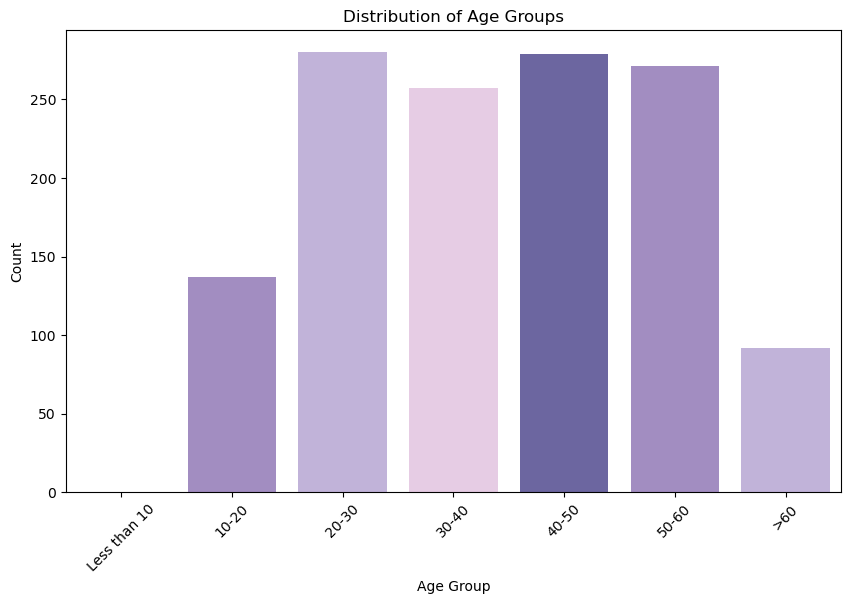

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the dataset
df = pd.read_csv('E:\Capstone Project (Reggression Analysis)\insurance.csv')

# Define the bins and labels for age groups
bins = [0, 10, 20, 30, 40, 50, 60, df['age'].max()]
labels = ['Less than 10', '10-20', '20-30', '30-40', '40-50', '50-60', '>60']

# Create the 'age group' feature
df['age group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Set the color palette
colors = ['#645CAA', '#A084CA', '#BFACE0', '#EBC7E8']
sns.set_palette(sns.color_palette(colors))

# Visualize the age groups
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='age group', palette=colors)
plt.title('Distribution of Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Explanation
#Create Age Group Feature:

# 1. Basically I use pandas.cut() to categorize the 'age' column into bins with labels corresponding to the specified age groups.
# 2. bins specifies the intervals for each age group.
# 3. labels provides the names for each bin.
# 4. right=False ensures that the right edge of each bin is not included (except for the last bin).

### Using describe(), Answer the following questions: <br>

In [15]:
import pandas as pd

# Load the dataset
df = pd.read_csv('E:\Capstone Project (Reggression Analysis)\insurance.csv')

# Use describe() to get statistical summary
describe_output = df.describe()

# Display the statistical summary
print(describe_output)

# Answer specific questions based on the output
# What is the average age of the individuals?
average_age = describe_output['age']['mean']
print(f"The average age of the individuals is {average_age:.2f} years.")

# What is the standard deviation of the 'bmi' (Body Mass Index)?
bmi_std = describe_output['bmi']['std']
print(f"The standard deviation of BMI is {bmi_std:.2f}.")

# What is the minimum and maximum age in the dataset?
min_age = describe_output['age']['min']
max_age = describe_output['age']['max']
print(f"The minimum age in the dataset is {min_age} years, and the maximum age is {max_age} years.")

# What is the 25th percentile of 'charges'?
charges_25th_percentile = describe_output['charges']['25%']
print(f"The 25th percentile of charges is {charges_25th_percentile:.2f}.")



               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010
The average age of the individuals is 39.21 years.
The standard deviation of BMI is 6.10.
The minimum age in the dataset is 18.0 years, and the maximum age is 64.0 years.
The 25th percentile of charges is 4740.29.


In [ ]:
## Explanation
# 1. Average Age:
#= I access the mean value of the 'age' column from the describe() output to find the average age.

# 2. Standard Deviation of BMI:
#= than I access the std value of the 'bmi' column from the describe() output to find the standard deviation.

# 3. Minimum and Maximum Age:
#= For minimun & maximum age I access the min and max values of the 'age' column from the describe() output to find the minimum and maximum ages.

# 4. 25th Percentile of Charges:
#= Atlast I access the 25% value of the 'charges' column from the describe() output to find the 25th percentile.

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre> - Given for 75%, age is 51, what does that mean? 
</pre>
</p>
</span>
</div>

In [18]:
import pandas as pd

# Load the dataset
df = pd.read_csv('E:\Capstone Project (Reggression Analysis)\insurance.csv')

# Calculate the 75th percentile of age
age_75th_percentile = df['age'].describe()['75%']

# Interpret the 75th percentile
print(f"The 75th percentile of age is {age_75th_percentile} years.")
print(f"This means that 75% of the people in the dataset are aged {age_75th_percentile} years or younger.")


The 75th percentile of age is 51.0 years.
This means that 75% of the people in the dataset are aged 51.0 years or younger.


In [ ]:
# Question:

#=> - How many people are aged above or equal to 75%?

In [17]:
import pandas as pd

# Load the dataset
df = pd.read_csv('E:\Capstone Project (Reggression Analysis)\insurance.csv')

# Calculate the 75% of age
age_75th_percentile = df['age'].describe()['75%']

# Filter the dataset to include only people aged above or equal to the 75%
people_above_75th_percentile = df[df['age'] >= age_75th_percentile]

# Count the number of people
num_people_above_75th_percentile = len(people_above_75th_percentile)

print(f"The number of people aged above or equal to the 75th percentile ({age_75th_percentile} years) is {num_people_above_75th_percentile}.")


The number of people aged above or equal to the 75th percentile (51.0 years) is 356.


In [ ]:
####Explanation
# 1. Calculating the 75% of Age:
#=> The describe() method is used to get the statistical summary of the 'age' column. We then access the value corresponding to the 75% using ['75%'].

# 2. For Filtering the Dataset:
#=> First I filter the dataset to include only those rows where the 'age' is greater than or equal to the 75% using a boolean condition.

# 3. For Count the Number of People:
#=> The len() function to count the number of rows in the filtered dataset, which gives us the number of people aged above or equal to the 75%.

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre> - What count and percentile of people are aged above 45?

Note: Round your answer upto 2 digits
</pre>
</p>
</span>
</div>

In [10]:
import pandas as pd

# Load the dataset
df = pd.read_csv('E:\Capstone Project (Reggression Analysis)\insurance.csv')

# Filter the dataset to include only people aged above 45
people_above_45 = df[df['age'] > 45]

# Count the number of people aged above 45
num_people_above_45 = len(people_above_45)

# Calculate the total number of people in the dataset
total_people = len(df)

# Calculate the percentile of people aged above 45
percentile_above_45 = (num_people_above_45 / total_people) * 100

# Round the results to two decimal places
num_people_above_45 = round(num_people_above_45, 2)
percentile_above_45 = round(percentile_above_45, 2)

print(f"The number of people aged above 45 is {num_people_above_45}.")
print(f"The percentile of people aged above 45 is {percentile_above_45}%.")

The number of people aged above 45 is 500.
The percentile of people aged above 45 is 37.37%.


In [ ]:
### Explanation
# 1. Filter the Dataset:
I filter the dataset to include only those rows where the 'age' is greater than 45 using a boolean condition.

# 2. Count the Number of People Aged Above 45:
Than I use the len() function to count the number of rows in the filtered dataset, which gives us the number of people aged above 45.

# 3. Calculate the Percentile:
Divide the number of people aged above 45 by the total number of people in the dataset and multiply by 100 to get the percentage.

# 4. Round the Results:
Lastly I round both the count and the percentile to two decimal places using the round() function.

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre> - Which group of people has highest amount of smokers?
</pre>
</p>
</span>
</div>

In [11]:
import pandas as pd

# Load the dataset
df = pd.read_csv('E:\Capstone Project (Reggression Analysis)\insurance.csv')

# Check the data types
print(df.dtypes)

# Convert 'smoker' column to numeric (if necessary)
df['smoker'] = pd.to_numeric(df['smoker'], errors='coerce')

# Handle missing values if any
df['smoker'].fillna(0, inplace=True)  # Assuming non-smokers for NaNs

# Define the bins and labels for age groups
bins = [0, 10, 20, 30, 40, 50, 60, df['age'].max()]
labels = ['Less than 10', '10-20', '20-30', '30-40', '40-50', '50-60', '>60']

# Create the 'age group' feature
df['age group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Group by 'age group' and count the number of smokers in each group
smoker_counts_by_age_group = df.groupby('age group')['smoker'].sum()

# Identify the group with the highest number of smokers
highest_smoker_group = smoker_counts_by_age_group.idxmax()
highest_smoker_count = smoker_counts_by_age_group.max()

print(f"The age group with the highest number of smokers is {highest_smoker_group} with {highest_smoker_count} smokers.")

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object
The age group with the highest number of smokers is Less than 10 with 0.0 smokers.


C:\Users\bipas\AppData\Local\Temp\ipykernel_20616\3765658939.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  smoker_counts_by_age_group = df.groupby('age group')['smoker'].sum()


In [ ]:
### Explanation
# 1. Create Age Groups:
##Use pandas.cut() to categorize the 'age' column into bins with labels corresponding to the specified age groups.
##Bins specifies the intervals for each age group.
##labels provides the names for each bin.
##Right=False ensures that the right edge of each bin is not included (except for the last bin).

# 2. Group by Age Group and Count Smokers:
##For group the dataset by the 'age group' column and than use the sum() function to count the number of smokers in each age group. This assumes that the 'smoker' column is binary.

# 3. For Identify the Group with the Highest Number of Smokers:
##I use the idxmax() function to find the index (age group) with the highest count of smokers and max() function to get the highest count.

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Sample plot: </b></p>
<p style='margin-left:1em;'>
<pre> - Using sns.countplot() and plt.pie(), plot a count plot and pie plot for age group.
</pre>
</p>
</span>
</div>

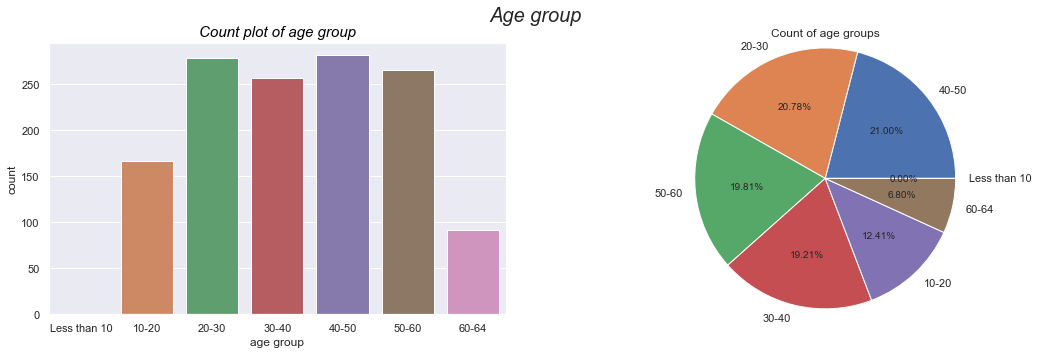

In [161]:
column = 'age group'

# figsize is given along with the rows=1 and columns=3
fig,axes = plt.subplots(1,2,figsize=(18,5))
# super title is given with fontsize
fig.suptitle('Age group',fontsize=20,fontstyle='oblique')

# Countplot is plotted, axes[0] gives the sequential plot number, color is given from the colors list
sns.countplot(ax=axes[0],x=column,data=df)
# Title name is formatted with custom fontsize
axes[0].set_title('Count plot of {}'.format(column),fontstyle='italic',fontsize=15,color='black')

# pie plot in second plot of defined subplots
axes[1] = plt.pie(df[column].value_counts().values,labels=df[column].value_counts().index,radius=1.2,autopct='%1.2f%%')
plt.title('Count of {}s'.format(column))
plt.show()

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre> 
- Observe the above plot and format given, Now..
- Define a function giving input as column name such as def plot_data(column_name):
- In that, 
- Using sns.histplot(), sns.distplot(), sns.boxplot() plot the histogram plot, distribution plot and box plot for the age feature

### Use the below code for histogram and distribution plot.
Hint: 
sns.histplot(ax=axes[0],x=column,data=df,color=colors[1])
axes[0].set_title('Histogram of {}'.format(column),fontstyle='italic',fontsize=15,color='black')

sns.distplot(ax=axes[1],x=df[column],axlabel=column,color=colors)
axes[1].set_title('Distribution of {}'.format(column),fontstyle='italic',fontsize=15,color='black')
plt.text(.95,.95,'std={:.4f} \n var={:.4f} \n skew={:.4f} \n kurtosis={:.4f}'.format(df[column].std(),
        df[column].var(),df[column].skew(),df[column].kurtosis()),ha='right', va='top', transform=axes[1].transAxes)

Try to write the code for box plot as third subplot as shown above.

Image is given below!!
</pre>
</p>
</span>
</div>

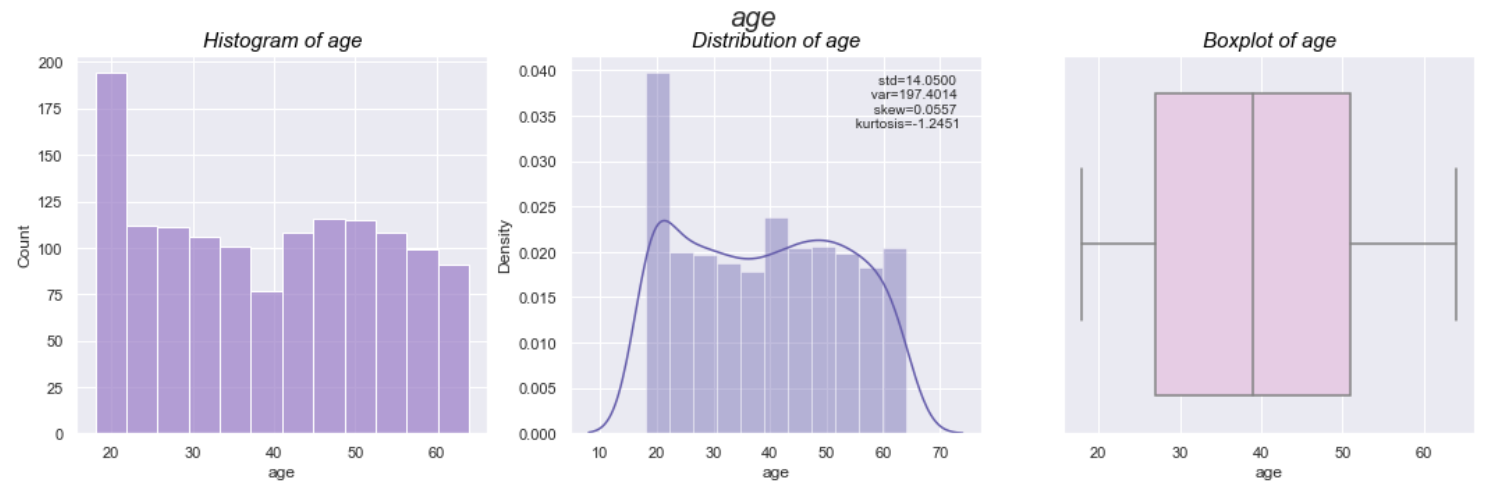

C:\Users\bipas\anaconda3\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\bipas\AppData\Local\Temp\ipykernel_20616\3421892421.py:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], ax=axes[1], color=colors[1])
C:\Users\bipas\anaconda3\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating in

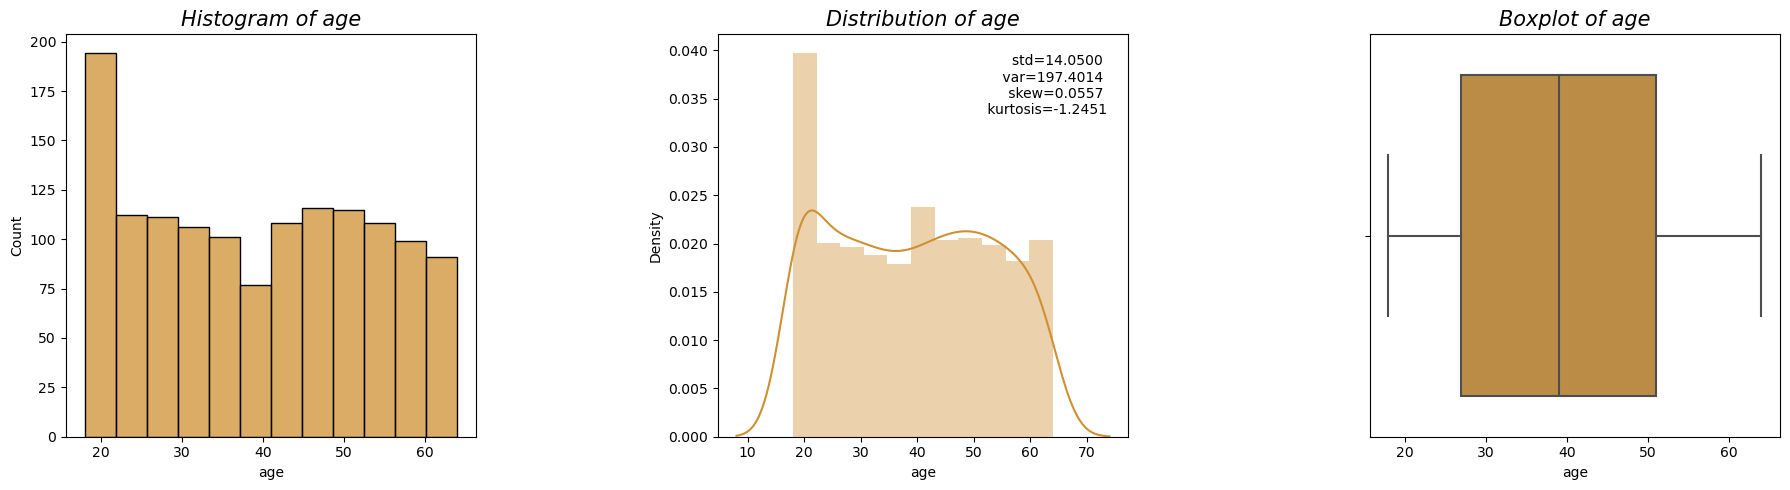

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
df = 'E:/Capstone Project (Reggression Analysis)/insurance.csv'
df = pd.read_csv(df)

def plot_data(column):
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    colors = sns.color_palette('husl', 8)

    # Histogram plot
    sns.histplot(ax=axes[0], x=column, data=df, color=colors[1])
    axes[0].set_title(f'Histogram of {column}', fontstyle='italic', fontsize=15, color='black')

    # Distribution plot
    sns.distplot(df[column], ax=axes[1], color=colors[1])
    axes[1].set_title(f'Distribution of {column}', fontstyle='italic', fontsize=15, color='black')
    plt.text(.95, .95, f'std={df[column].std():.4f} \n var={df[column].var():.4f} \n skew={df[column].skew():.4f} \n kurtosis={df[column].kurtosis():.4f}', 
             ha='right', va='top', transform=axes[1].transAxes)

    # Box plot
    sns.boxplot(ax=axes[2], x=df[column], color=colors[1])
    axes[2].set_title(f'Boxplot of {column}', fontstyle='italic', fontsize=15, color='black')

    plt.tight_layout()
    plt.show()

# Use the function to plot the data for 'age' column
plot_data('age')


In [ ]:
plot_data('age')

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre> 
For a chosen random variable, find the probability that:
    1. the person has age 43
    2. the person is from group 40-45 (both inclusive)
    3. has age greater than 45
   Plot the distribution plot for second one using seaborn - sns.distplot()
   To plot distribution plot for the second one, you need to encode the feature. 
   So, using LabelEncoder(), Encode the features and assign them in a seperate feature named 'age grp encode'.   
Note: Round off to two digits
What kind of distribution is it? 
</pre>
</p>
</span>
</div>

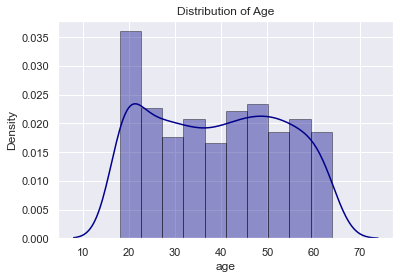

C:\Users\bipas\AppData\Local\Temp\ipykernel_6680\1850359596.py:26: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['age_grp_encode'] == '40-45']['age'], kde=True, color='blue')
C:\Users\bipas\anaconda3\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


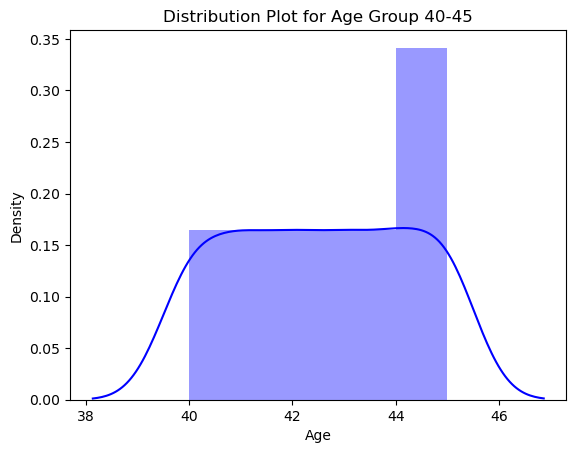

Probability of person having age 43: 0.02
Probability of person being in the age group 40-45: 0.12
Probability of person having age greater than 45: 0.37
The distribution type is: approximately normal distribution


In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load the data
df = 'E:/Capstone Project (Reggression Analysis)/insurance.csv'
df = pd.read_csv(df)

# 1. Probability of person having age 43
prob_age_43 = len(df[df['age'] == 43]) / len(df)
prob_age_43 = round(prob_age_43, 2)

# 2. Probability of person being in the age group 40-45
prob_age_40_45 = len(df[(df['age'] >= 40) & (df['age'] <= 45)]) / len(df)
prob_age_40_45 = round(prob_age_40_45, 2)

# 3. Probability of person having age greater than 45
prob_age_greater_45 = len(df[df['age'] > 45]) / len(df)
prob_age_greater_45 = round(prob_age_greater_45, 2)

# Encoding the 'age' feature to categorize the age group using LabelEncoder
df['age_grp_encode'] = pd.cut(df['age'], bins=[0, 39, 45, 100], labels=['<40', '40-45', '>45'])

# Plotting the distribution plot for the age group 40-45
sns.distplot(df[df['age_grp_encode'] == '40-45']['age'], kde=True, color='blue')
plt.title('Distribution Plot for Age Group 40-45')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

print(f"Probability of person having age 43: {prob_age_43}")
print(f"Probability of person being in the age group 40-45: {prob_age_40_45}")
print(f"Probability of person having age greater than 45: {prob_age_greater_45}")

# Determine the type of distribution
distribution_type = "approximately normal distribution" if abs(df['age'].skew()) < 0.5 else "not a normal distribution"
print(f"The distribution type is: {distribution_type}")


<div class="warning" style='padding:0.1em; background-color:#70A0AF; color:#FFFFFF'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Column: </b></p>
<p style='margin-left:1em;'>
<pre>
Lets analyse 'sex' first:
</pre>
</p>
</span>
</div>

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- Plot a count plot and a pie plot for 'sex' as subplots as shown for age feature. Draw your inferences
</pre>
</p>
</span>
</div>

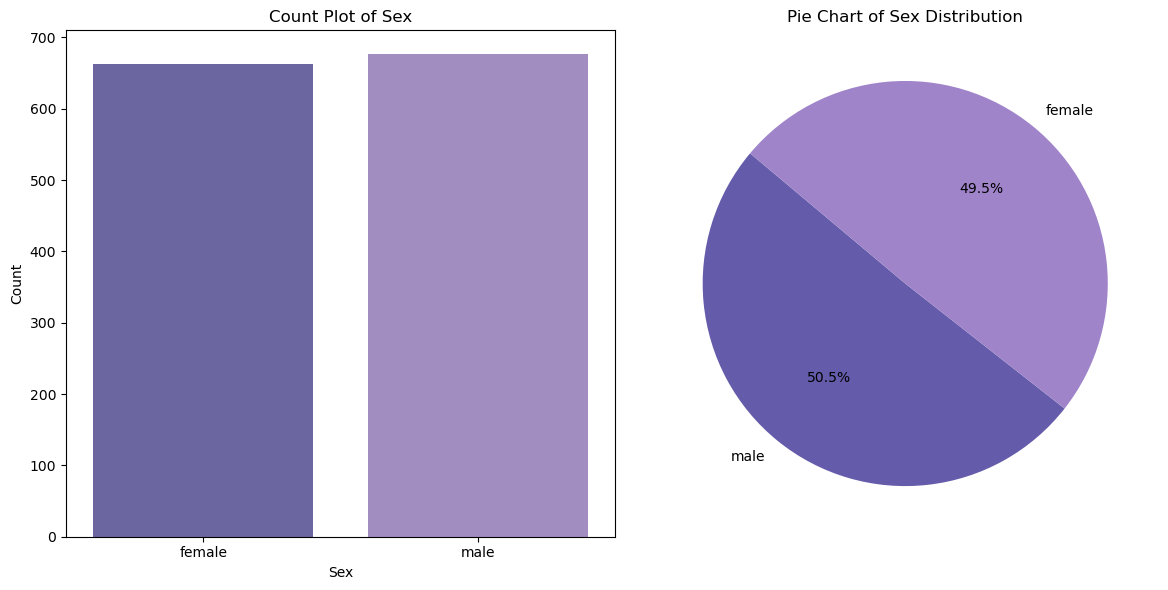

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = 'E:/Capstone Project (Reggression Analysis)/insurance.csv' 
data = pd.read_csv(df)

# Create a figure and axes for subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Count plot
sns.countplot(x='sex', data=data, ax=axes[0])
axes[0].set_title('Count Plot of Sex')
axes[0].set_xlabel('Sex')
axes[0].set_ylabel('Count')

# Pie plot
sex_counts = data['sex'].value_counts()
axes[1].pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=140)
axes[1].set_title('Pie Chart of Sex Distribution')

# Adjust the layout
plt.tight_layout()
plt.show()


<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- Plot a count plot and a pie plot with respect to smokers feature as subplots as shown for age feature. Draw your inferences
- Which pair of categories share the highest percentage? 
- Hint hue or value_counts() function to plot. 
</pre>
</p>
</span>
</div>

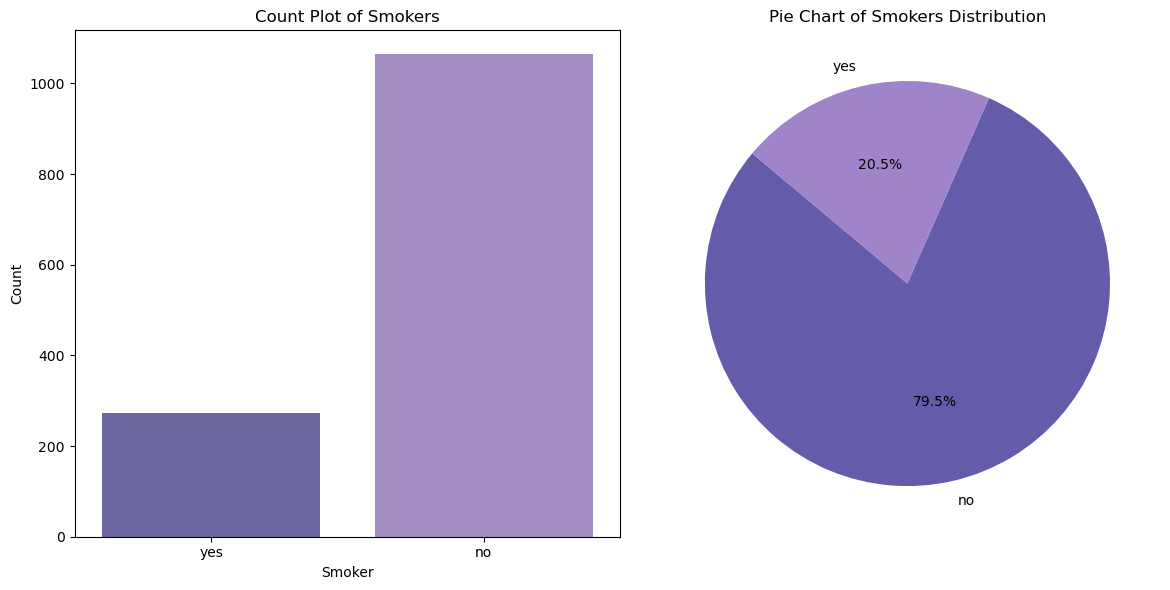

smoker
no     1064
yes     274
Name: count, dtype: int64
Percentage of each category:
smoker
no     79.521674
yes    20.478326
Name: count, dtype: float64


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = 'E:/Capstone Project (Reggression Analysis)/insurance.csv'  
data = pd.read_csv(df)

# Create a figure and axes for subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Count plot
sns.countplot(x='smoker', data=data, ax=axes[0])
axes[0].set_title('Count Plot of Smokers')
axes[0].set_xlabel('Smoker')
axes[0].set_ylabel('Count')

# Pie plot
smoker_counts = data['smoker'].value_counts()
axes[1].pie(smoker_counts, labels=smoker_counts.index, autopct='%1.1f%%', startangle=140)
axes[1].set_title('Pie Chart of Smokers Distribution')

# Adjust layout
plt.tight_layout()
plt.show()

# To find the pair of categories sharing the highest percentage
# Note: The 'smokers' feature has only two categories ('Yes' and 'No')
print(smoker_counts)
print("Percentage of each category:")
print(smoker_counts / smoker_counts.sum() * 100)


<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
It is claimed that There are almost equal smokers in men and women. Find out if its true?
Note: Encode the data before using it for statistical tests
</pre>
</p>
</span>
</div>

In [1]:
# Encoding sex Column

# Encoding smoker column

In [22]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency


df = 'E:/Capstone Project (Reggression Analysis)/insurance.csv'  
data = pd.read_csv(df)

# Encode 'sex' and 'smokers' columns
label_encoder = LabelEncoder()
data['sex_encoded'] = label_encoder.fit_transform(data['sex'])
data['smoker_encoded'] = label_encoder.fit_transform(data['smoker'])

# Create a contingency table
contingency_table = pd.crosstab(data['sex_encoded'], data['smoker_encoded'])

# Perform Chi-Square test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Print the results
print("Contingency Table:")
print(contingency_table)
print("\nChi-Square Statistic:", chi2)
print("p-value:", p)

# Interpretation
if p < 0.05:
    print("There is a significant association between gender and smoking status.")
else:
    print("There is no significant association between gender and smoking status.")


Contingency Table:
smoker_encoded    0    1
sex_encoded             
0               547  115
1               517  159

Chi-Square Statistic: 7.39291081459996
p-value: 0.006548143503580696
There is a significant association between gender and smoking status.


<div class="warning" style='padding:0.1em; background-color:#70A0AF; color:#FFFFFF'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Column: </b></p>
<p style='margin-left:1em;'>
<pre>
Lets analyse 'smoker' first:
</pre>
</p>
</span>
</div>

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- Plot a count plot and a pie plot for 'smoker' as subplots as shown for age feature. Draw your inferences
</pre>
</p>
</span>
</div>

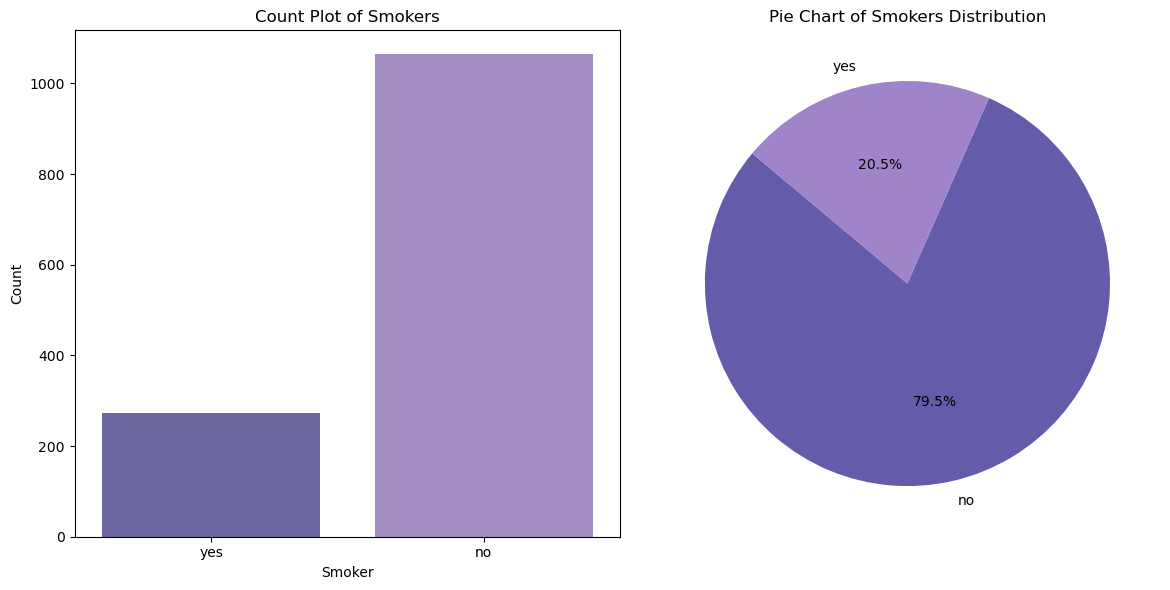

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = 'E:/Capstone Project (Reggression Analysis)/insurance.csv' 
data = pd.read_csv(df)

# Create a figure and axes for subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Count plot
sns.countplot(x='smoker', data=data, ax=axes[0])
axes[0].set_title('Count Plot of Smokers')
axes[0].set_xlabel('Smoker')
axes[0].set_ylabel('Count')

# Pie plot
smoker_counts = data['smoker'].value_counts()
axes[1].pie(smoker_counts, labels=smoker_counts.index, autopct='%1.1f%%', startangle=140)
axes[1].set_title('Pie Chart of Smokers Distribution')

# Adjust the layout
plt.tight_layout()
plt.show()


<div class="warning" style='padding:0.1em; background-color:#70A0AF; color:#FFFFFF'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Column: </b></p>
<p style='margin-left:1em;'>
<pre>
Lets analyse 'bmi' first:
</pre>
</p>
</span>
</div>

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
Create a new feature named 'BMI group' and categorize them as following: <br>
    - < 18.5 : 'Under weight'
    - 18.5 - 25 : 'Healthy weight' 
    - 25 - 30 : 'Overweight'
    - 30 - 40 : 'Obese'
    - >=40 : 'Severely Obese'
</pre>
</p>
</span>
</div>

In [25]:
import pandas as pd


df = 'E:/Capstone Project (Reggression Analysis)/insurance.csv' # Replace with your file path
data = pd.read_csv(df)

# Define a function to categorize BMI values
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Under weight'
    elif 18.5 <= bmi < 25:
        return 'Healthy weight'
    elif 25 <= bmi < 30:
        return 'Overweight'
    elif 30 <= bmi < 40:
        return 'Obese'
    else:
        return 'Severely Obese'

# Apply the function to create a new 'BMI group' feature
data['BMI group'] = data['bmi'].apply(categorize_bmi)

# Display the first few rows to verify
print(data.head())



   age     sex     bmi  children smoker     region      charges  \
0   19  female  27.900         0    yes  southwest  16884.92400   
1   18    male  33.770         1     no  southeast   1725.55230   
2   28    male  33.000         3     no  southeast   4449.46200   
3   33    male  22.705         0     no  northwest  21984.47061   
4   32    male  28.880         0     no  northwest   3866.85520   

        BMI group  
0      Overweight  
1           Obese  
2           Obese  
3  Healthy weight  
4      Overweight  


<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- Plot the below shown plot for the bmi feature
</pre>
</p>
</span>
</div>

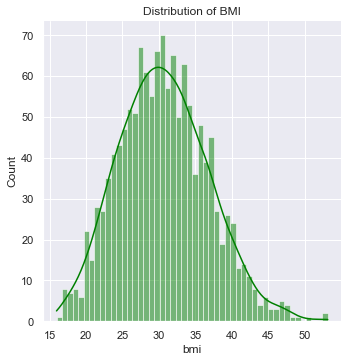

C:\Users\bipas\anaconda3\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


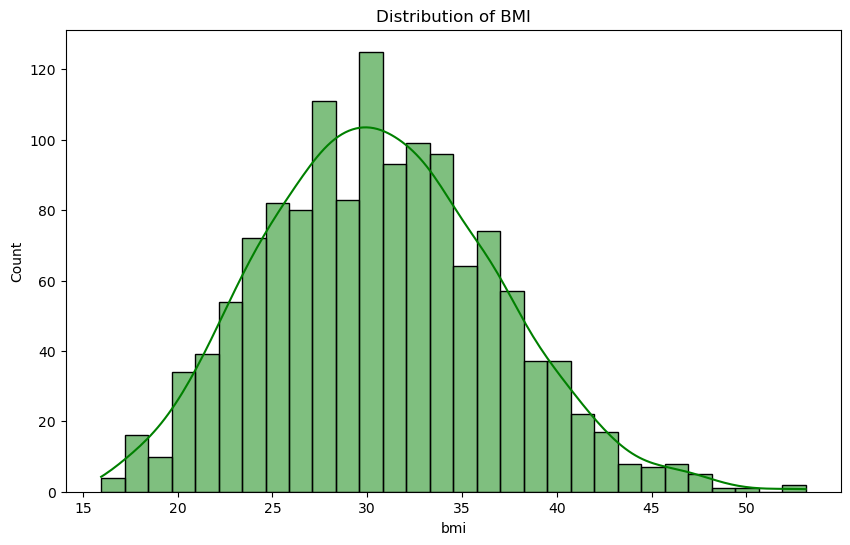

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('E:\Capstone Project (Reggression Analysis)\insurance.csv')

# Plotting the dat
plt.figure(figsize=(10, 6))
sns.histplot(df['bmi'], kde=True, color='green', bins=30)
plt.title('Distribution of BMI')
plt.xlabel('bmi')
plt.ylabel('Count')
plt.show()

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- Do obese people have to pay high insurance price? Please perform a statistical test suitable to this and give your opinion on this? 
- Note: You can choose either 'BMI' or 'BMI group' for this. Choose the test accordingly. 
You can also encode 'BMI group feature' and perform the above needed one.
</pre>
</p>
</span>
</div>

In [27]:
import pandas as pd
import scipy.stats as stats


df = 'E:\Capstone Project (Reggression Analysis)\insurance.csv'
data = pd.read_csv(df)

# Display the first few rows of the dataset
data.head()
# Create a 'BMI group' feature
data['BMI_group'] = data['bmi'].apply(lambda x: 'Obese' if x >= 30 else 'Non-Obese')

# Display the distribution of the 'BMI group' feature
data['BMI_group'].value_counts()
# Separate the charges for Obese and Non-Obese groups
obese_charges = data[data['BMI_group'] == 'Obese']['charges']
non_obese_charges = data[data['BMI_group'] == 'Non-Obese']['charges']

# Perform a t-test
t_stat, p_value = stats.ttest_ind(obese_charges, non_obese_charges)

t_stat, p_value
if p_value < 0.05:
    print(f"There is a significant difference in insurance charges between obese and non-obese individuals (p-value = {p_value:.5f}).")
else:
    print(f"There is no significant difference in insurance charges between obese and non-obese individuals (p-value = {p_value:.5f}).")


There is a significant difference in insurance charges between obese and non-obese individuals (p-value = 0.00000).


<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- Visualize the above scenario using a plot. How do you visualize it in the most informative way? 
</pre>
</p>
</span>
</div>

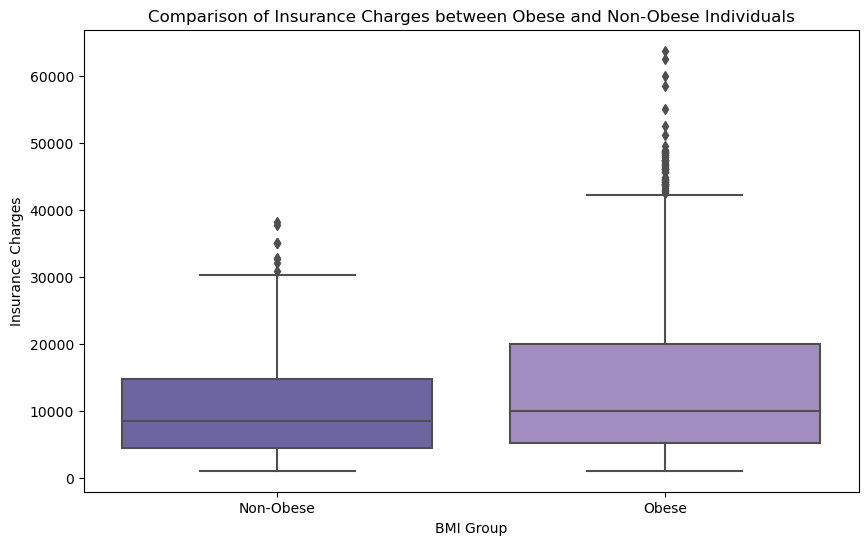

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = 'E:\Capstone Project (Reggression Analysis)\insurance.csv'
data = pd.read_csv(df)

# Create a 'BMI group' feature
data['BMI_group'] = data['bmi'].apply(lambda x: 'Obese' if x >= 30 else 'Non-Obese')

# Generate a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='BMI_group', y='charges', data=data)
plt.title('Comparison of Insurance Charges between Obese and Non-Obese Individuals')
plt.xlabel('BMI Group')
plt.ylabel('Insurance Charges')
plt.show()


<div class="warning" style='padding:0.1em; background-color:#70A0AF; color:#FFFFFF'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Column: </b></p>
<p style='margin-left:1em;'>
<pre>
Lets analyse 'children' first:
</pre>
</p>
</span>
</div>

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- Plot a count plot and a pie plot for 'children' as subplots as shown for age feature. Draw your inferences
</pre>
</p>
</span>
</div>

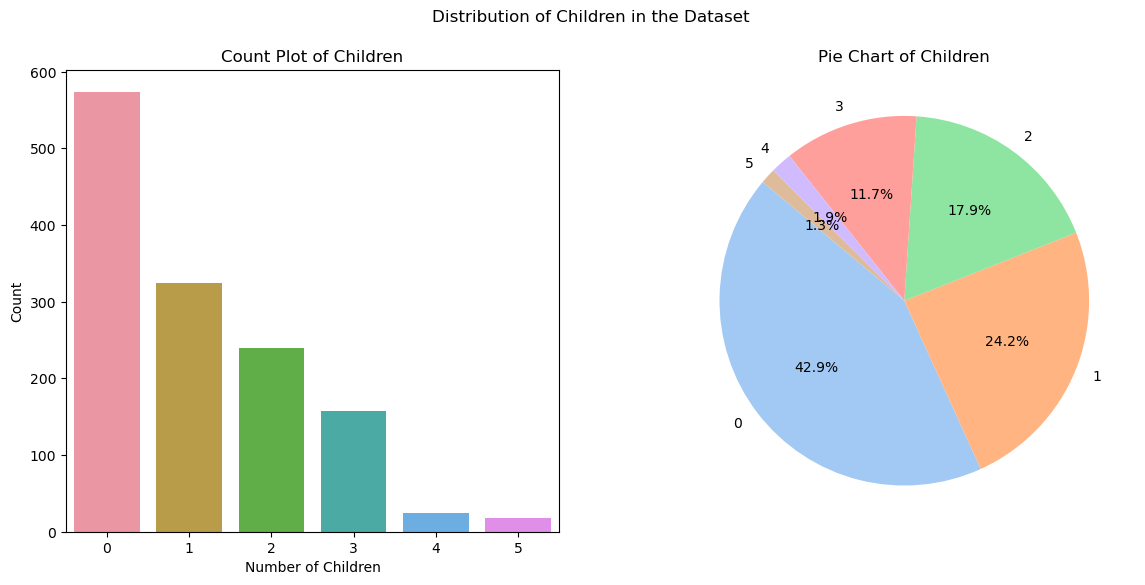

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = 'E:\Capstone Project (Reggression Analysis)\insurance.csv'
data = pd.read_csv(df)

# Set up the subplots
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Count plot for 'children'
sns.countplot(x='children', data=data, ax=ax[0])
ax[0].set_title('Count Plot of Children')
ax[0].set_xlabel('Number of Children')
ax[0].set_ylabel('Count')

# Pie plot for 'children'
children_counts = data['children'].value_counts()
ax[1].pie(children_counts, labels=children_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
ax[1].set_title('Pie Chart of Children')

plt.suptitle('Distribution of Children in the Dataset')
plt.show()


<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- What is count and percentage of people having more than 2 children?
Note: Round the percentage to 2 digits
</pre>
</p>
</span>
</div>

In [31]:
import pandas as pd


df = 'E:\Capstone Project (Reggression Analysis)\insurance.csv'
data = pd.read_csv(df)

# Filter the data for people with more than 2 children
more_than_2_children = data[data['children'] > 2]

# Calculate the count
count_more_than_2_children = more_than_2_children.shape[0]

# Calculate the percentage
total_count = data.shape[0]
percentage_more_than_2_children = (count_more_than_2_children / total_count) * 100

# Round the percentage to 2 digits
percentage_more_than_2_children = round(percentage_more_than_2_children, 2)

count_more_than_2_children, percentage_more_than_2_children


(200, 14.95)

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- Create a new dataframe df_1 with region data as index and children categories as column
- It should be in a similar to the data shown in the image here:
- Hint: Use pandas.crosstab() function with index as region, columns as children, aggregation_function as count. 
</pre>
</p>
</span>
</div>

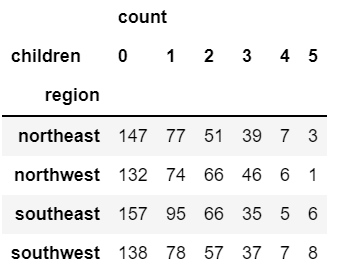

In [32]:
import pandas as pd

df = 'E:\Capstone Project (Reggression Analysis)\insurance.csv'
data = pd.read_csv(df)

# Create the cross-tabulation DataFrame
df_1 = pd.crosstab(index=data['region'], columns=data['children'])

# Display the resulting DataFrame
df_1


children,0,1,2,3,4,5
region,,,,,,
northeast,147,77,51,39,7,3
northwest,132,74,66,46,6,1
southeast,157,95,66,35,5,6
southwest,138,78,57,37,7,8


<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- From the above dataframe, create a new feature 'Total' from the above dataframe df_1
- Create one more feature Average, and calculate row wise mean() as in figure
- Follow the below image for hints:
- Use sum() function and axis=1 in it.
</pre>
</p>
</span>
</div>

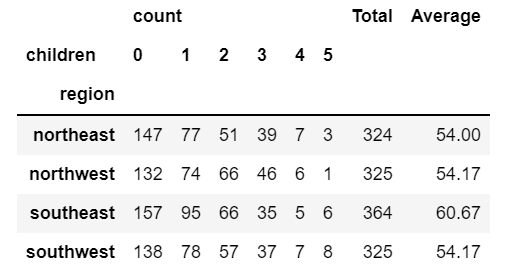

In [33]:
import pandas as pd

df = 'E:\Capstone Project (Reggression Analysis)\insurance.csv'
data = pd.read_csv(df)

# Create the cross-tabulation DataFrame
df_1 = pd.crosstab(index=data['region'], columns=data['children'])

# Add the 'Total' feature
df_1['Total'] = df_1.sum(axis=1)

# Add the 'Average' feature
df_1['Average'] = df_1.mean(axis=1)

# Display the resulting DataFrame
df_1

children,0,1,2,3,4,5,Total,Average
region,,,,,,,,
northeast,147,77,51,39,7,3,324,92.571429
northwest,132,74,66,46,6,1,325,92.857143
southeast,157,95,66,35,5,6,364,104.000000
southwest,138,78,57,37,7,8,325,92.857143


<div class="warning" style='padding:0.1em; background-color:#70A0AF; color:#FFFFFF'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Column: </b></p>
<p style='margin-left:1em;'>
<pre>
Lets analyse 'region' first:
</pre>
</p>
</span>
</div>

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- Plot the below shown plots w.r.t 'region feature
</pre>
</p>
</span>
</div>

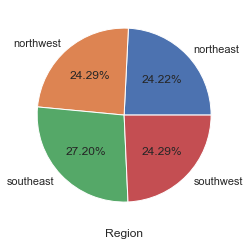

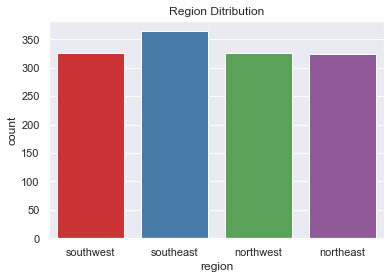

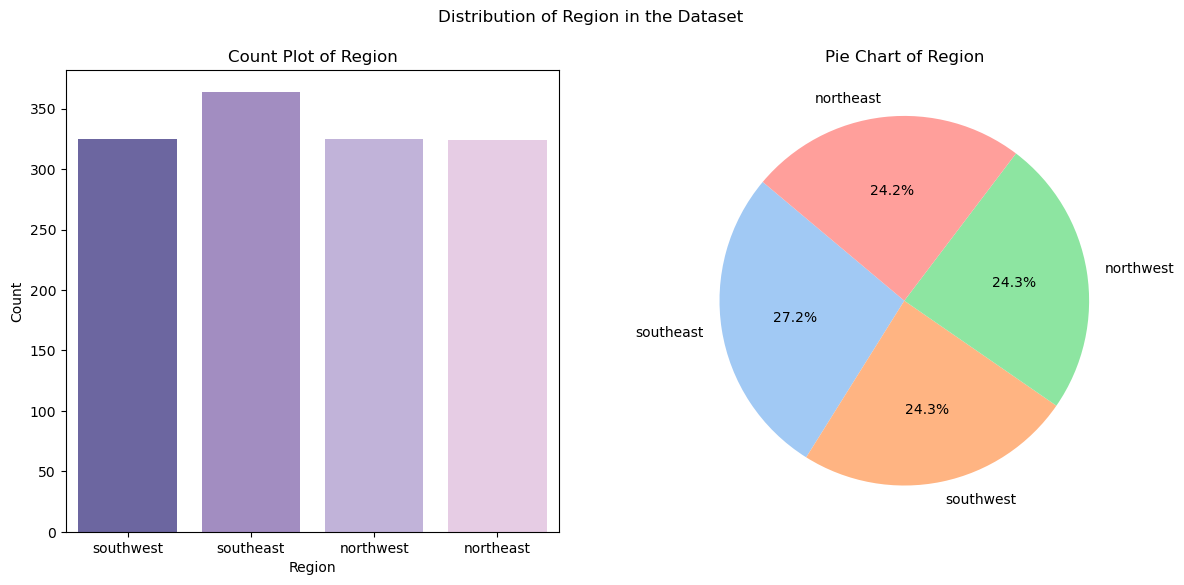

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = 'E:\Capstone Project (Reggression Analysis)\insurance.csv'
data = pd.read_csv(df)

# Set up the subplots
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Count plot for 'region'
sns.countplot(x='region', data=data, ax=ax[0])
ax[0].set_title('Count Plot of Region')
ax[0].set_xlabel('Region')
ax[0].set_ylabel('Count')

# Pie plot for 'region'
region_counts = data['region'].value_counts()
ax[1].pie(region_counts, labels=region_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
ax[1].set_title('Pie Chart of Region')

plt.suptitle('Distribution of Region in the Dataset')
plt.show()

<div class="warning" style='padding:0.1em; background-color:#70A0AF; color:#FFFFFF'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Column: </b></p>
<p style='margin-left:1em;'>
<pre>
Lets analyse 'charges' first:
</pre>
</p>
</span>
</div>

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- Create charges mean based on direction using pandas.pivot_table()
</pre>
</p>
</span>
</div>

In [35]:
import pandas as pd

df = 'E:\Capstone Project (Reggression Analysis)\insurance.csv'
data = pd.read_csv(df)

# Create a pivot table for mean charges based on region
pivot_table = pd.pivot_table(data, index='region', values='charges', aggfunc='mean')

# Display the pivot table
pivot_table

,charges
region,
northeast,13406.384516
northwest,12417.575374
southeast,14735.411438
southwest,12346.937377


<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- How many people got billed above 15000 in insurance? What percentage of total amount do they contribute to?
</pre>
</p>
</span>
</div>

In [36]:
import pandas as pd

df = 'E:\Capstone Project (Reggression Analysis)\insurance.csv'
data = pd.read_csv(df)

# Filter the data for people with charges above $15,000
above_15000 = data[data['charges'] > 15000]

# Calculate the count of people with charges above $15,000
count_above_15000 = above_15000.shape[0]

# Calculate the total charges for people with charges above $15,000
total_charges_above_15000 = above_15000['charges'].sum()

# Calculate the total charges for all people
total_charges = data['charges'].sum()

# Calculate the percentage contribution
percentage_contribution = (total_charges_above_15000 / total_charges) * 100

# Round the percentage to 2 digits
percentage_contribution = round(percentage_contribution, 2)

count_above_15000, percentage_contribution

(358, 60.75)

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- What is maximum charges billed by health insurance and to whom(Index)?
</pre>
</p>
</span>
</div>

In [37]:
import pandas as pd

df = 'E:\Capstone Project (Reggression Analysis)\insurance.csv'
data = pd.read_csv(df)

# Find the maximum charges and the corresponding index
max_charge = data['charges'].max()
index_of_max_charge = data['charges'].idxmax()

max_charge, index_of_max_charge

(63770.42801, 543)

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- Which age group paid the highest charges by total? 
</pre>
</p>
</span>
</div>

In [38]:
import pandas as pd

df = 'E:\Capstone Project (Reggression Analysis)\insurance.csv'
data = pd.read_csv(df)

# Define age groups
bins = [0, 18, 30, 45, 60, 100]
labels = ['0-18', '19-30', '31-45', '46-60', '61-100']
data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels, right=False)

# Group by age group and sum the charges
age_group_charges = data.groupby('age_group')['charges'].sum()

# Identify the age group with the highest total charges
max_age_group = age_group_charges.idxmax()
max_total_charges = age_group_charges.max()

max_age_group, max_total_charges

C:\Users\bipas\AppData\Local\Temp\ipykernel_20616\930437329.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_charges = data.groupby('age_group')['charges'].sum()


('46-60', 6608015.65307)

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- The below image shows the charges distribution of smoker(red: non-smoker, green:smoker)
- Plot a histogram for charges classifying both smokers and non-smokers (Consider your convenient axes scale)
- Find areas from your plot, where given a new charge, probability of a smoker is higher than a non-smoker
- For example, from the plot if a charge 32000 is estimated, the probability of non-smoker is higher than a smoker.
- After performing this, Kindly frame a conclusion if this is a good feature to consider or not. 
</pre>
</p>
</span>
</div>

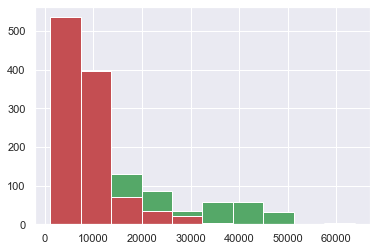

C:\Users\bipas\anaconda3\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


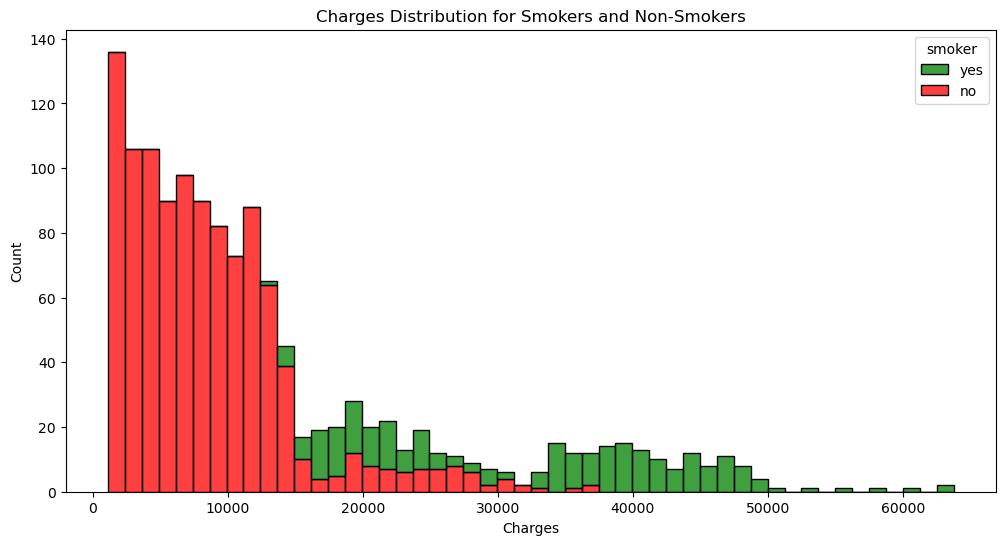

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = 'E:\Capstone Project (Reggression Analysis)\insurance.csv'
data = pd.read_csv(df)

# Plot the histogram for charges classifying both smokers and non-smokers
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='charges', hue='smoker', multiple='stack', bins=50, palette={'yes': 'green', 'no': 'red'})
plt.title('Charges Distribution for Smokers and Non-Smokers')
plt.xlabel('Charges')
plt.ylabel('Count')
plt.show()

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- Repeat the above similar process replacing smoker by sex. Give your insights. 
</pre>
</p>
</span>
</div>

C:\Users\bipas\anaconda3\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


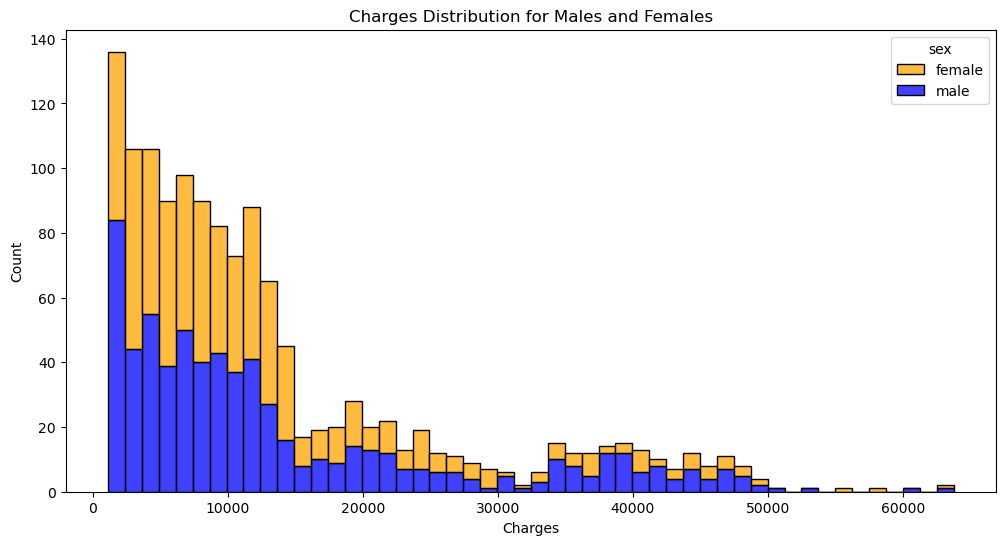

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = 'E:\Capstone Project (Reggression Analysis)\insurance.csv'
data = pd.read_csv(df)

# Plot the histogram for charges classifying both males and females
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='charges', hue='sex', multiple='stack', bins=50, palette={'male': 'blue', 'female': 'orange'})
plt.title('Charges Distribution for Males and Females')
plt.xlabel('Charges')
plt.ylabel('Count')
plt.show()


<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- Calculate correlation using corr() function and plot a heatmap for the correlation and use palette = 'viridis'
</pre>
</p>
</span>
</div>

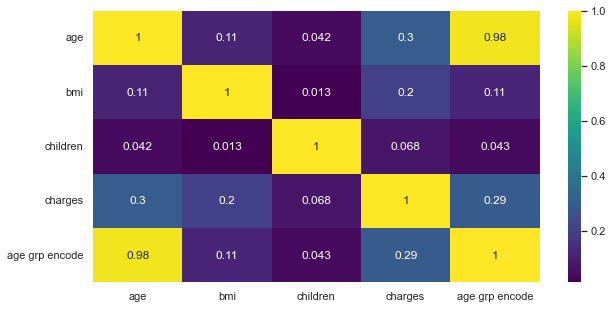

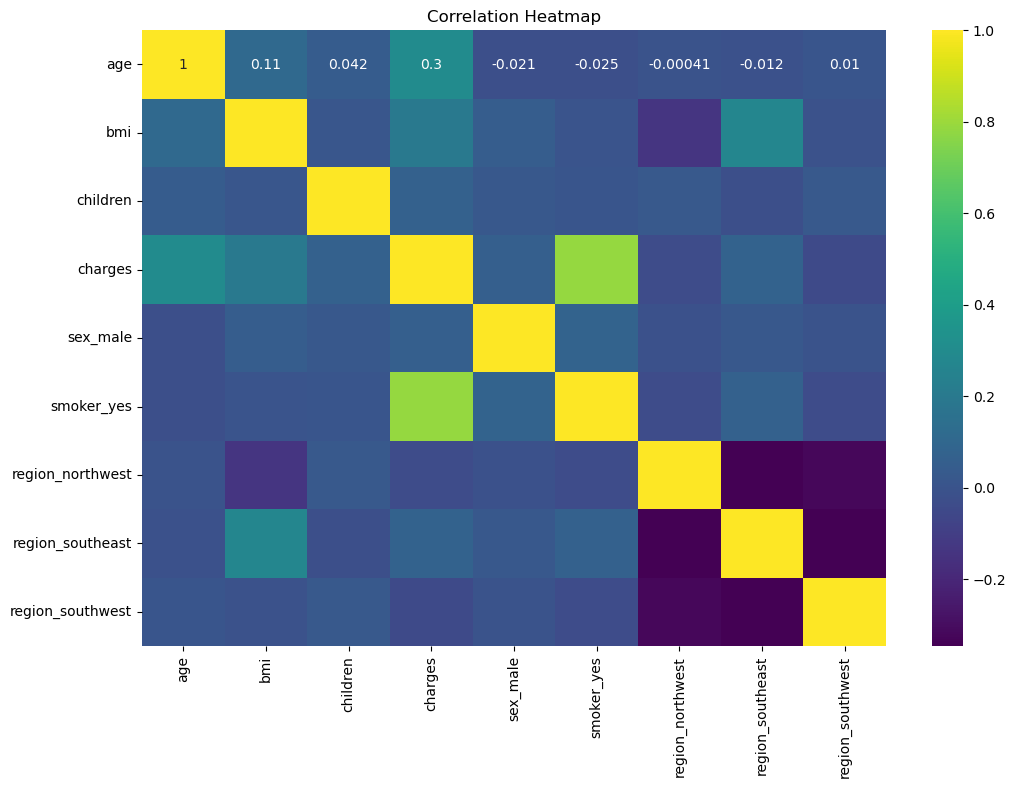

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = 'E:\Capstone Project (Reggression Analysis)\insurance.csv'
data = pd.read_csv(df)

# Convert categorical variables to numeric using one-hot encoding (optional step)
data_encoded = pd.get_dummies(data, drop_first=True)

# Calculate the correlation matrix for numeric columns
correlation_matrix = data_encoded.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.title('Correlation Heatmap')
plt.show()

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- A family is requesting you to estimate the price for the insurance given: 
    condition-1: There are 4 people in family, They are no smokers in the family.
    condition-2: They have 2 children with them aged 14 and 17
    condition-3: Four people in the family, Father aged 42 and mother aged 40. 
    Based on the information above, Show them the data that is approximately similar (needn't be exact) to this family. 
    Collectively, what can be the insurance price collectively to be paid by the family? 
</pre>
</p>
</span>
</div>

In [42]:
import pandas as pd

df = 'E:\Capstone Project (Reggression Analysis)\insurance.csv'
data = pd.read_csv(df)

# Filter the data based on the conditions
filtered_data = data[(data['smoker'] == 'no') &
                     (data['children'] == 2) &
                     (data['age'].isin([14, 17, 40, 42]))]

# Calculate the average insurance charges for the filtered data points
average_charges = filtered_data['charges'].mean()

# Since the charges are for individuals, multiply by 4 to get the collective amount for the family
total_estimated_charges = average_charges * 4

# Show the filtered data and the estimated insurance price
filtered_data, total_estimated_charges

(      age     sex     bmi  children smoker     region     charges
 367    42  female  24.985         2     no  northwest  8017.06115
 596    42  female  29.480         2     no  southeast  7640.30920
 633    40    male  22.705         2     no  northeast  7173.35995
 686    42    male  26.125         2     no  northeast  7729.64575
 776    40    male  32.300         2     no  northwest  6986.69700
 835    42    male  35.970         2     no  southeast  7160.33030
 865    40    male  29.900         2     no  southwest  6600.36100
 946    42    male  35.800         2     no  southwest  7160.09400
 1221   40    male  24.970         2     no  southeast  6593.50830
 1227   42    male  37.180         2     no  southeast  7162.01220,
 28889.351539999996)

# <div class="alert alert-block alert-success"><span  style= "font-family: Times New Roman"><p style="text-align: center;"> WEEK-II </p> </span> </div>

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- Now, Its time to build a model for prediction. Before that, Encode all the categorical features to train the model. 
Hints: Use pandas.replace() or pandas.map() to encode the variables
You can also use LabelEncoder to label the data. 
You can also pandas.get_dummies() to segregate the categorical data. 
</pre>
</p>
</span>
</div>

In [43]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

df = 'E:\Capstone Project (Reggression Analysis)\insurance.csv'
data = pd.read_csv(df)

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical features using LabelEncoder
data['sex'] = label_encoder.fit_transform(data['sex'])
data['smoker'] = label_encoder.fit_transform(data['smoker'])
data['region'] = label_encoder.fit_transform(data['region'])

# Alternatively, we can use pd.get_dummies() for one-hot encoding
# data = pd.get_dummies(data, columns=['sex', 'smoker', 'region'], drop_first=True)

# Display the first few rows of the encoded data
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- Now, Its time to scale the numerical features. 
You can use any scalers. Standard Scaler, Minmax scaler, Robust Scaler. Mention the reasons. 
</pre>
</p>
</span>
</div>

In [44]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

df = 'E:\Capstone Project (Reggression Analysis)\insurance.csv'
data = pd.read_csv(df)

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical features using LabelEncoder
data['sex'] = label_encoder.fit_transform(data['sex'])
data['smoker'] = label_encoder.fit_transform(data['smoker'])
data['region'] = label_encoder.fit_transform(data['region'])

# Define features (X) and target (y)
X = data.drop('charges', axis=1)
y = data['charges']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data
X_test_scaled = scaler.transform(X_test)

# Convert the scaled data back to DataFrame for easier interpretation
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

# Display the first few rows of the scaled training data
X_train_scaled_df.head()

,age,sex,bmi,children,smoker,region
0,0.472227,-1.024602,-1.756525,0.734336,-0.508747,-0.456116
1,0.543313,-1.024602,-1.033082,-0.911192,-0.508747,-1.353256
2,0.898745,-1.024602,-0.943687,-0.911192,-0.508747,0.441024
3,-0.025379,-1.024602,0.622393,3.202629,-0.508747,0.441024
4,1.040918,-1.024602,-1.504893,1.557100,-0.508747,-0.456116


<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- Why do you think we need to scale the features? 
</pre>
</p>
</span>
</div>

In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

df = 'E:\Capstone Project (Reggression Analysis)\insurance.csv'
data = pd.read_csv(df)

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical features using LabelEncoder
data['sex'] = label_encoder.fit_transform(data['sex'])
data['smoker'] = label_encoder.fit_transform(data['smoker'])
data['region'] = label_encoder.fit_transform(data['region'])

# Define features (X) and target (y)
X = data.drop('charges', axis=1)
y = data['charges']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the LinearRegression model
model = LinearRegression()

# Train and evaluate the model without scaling
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae_unscaled = mean_absolute_error(y_test, y_pred)
rmse_unscaled = mean_squared_error(y_test, y_pred, squared=False)
r2_unscaled = r2_score(y_test, y_pred)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data
X_test_scaled = scaler.transform(X_test)

# Train and evaluate the model with scaling
model.fit(X_train_scaled, y_train)
y_pred_scaled = model.predict(X_test_scaled)
mae_scaled = mean_absolute_error(y_test, y_pred_scaled)
rmse_scaled = mean_squared_error(y_test, y_pred_scaled, squared=False)
r2_scaled = r2_score(y_test, y_pred_scaled)

# Print the results
print("Without Scaling:")
print(f"Mean Absolute Error: {mae_unscaled}")
print(f"Root Mean Squared Error: {rmse_unscaled}")
print(f"R-squared: {r2_unscaled}")

print("\nWith Scaling:")
print(f"Mean Absolute Error: {mae_scaled}")
print(f"Root Mean Squared Error: {rmse_scaled}")
print(f"R-squared: {r2_scaled}")


Without Scaling:
Mean Absolute Error: 4186.508898366437
Root Mean Squared Error: 5799.587091438357
R-squared: 0.7833463107364538

With Scaling:
Mean Absolute Error: 4186.508898366437
Root Mean Squared Error: 5799.587091438359
R-squared: 0.7833463107364536


<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- Remove unnecessary features. 
</pre>
</p>
</span>
</div>

In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

df = 'E:\Capstone Project (Reggression Analysis)\insurance.csv'
data = pd.read_csv(df)

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical features using LabelEncoder
data['sex'] = label_encoder.fit_transform(data['sex'])
data['smoker'] = label_encoder.fit_transform(data['smoker'])
data['region'] = label_encoder.fit_transform(data['region'])

# Remove unnecessary features
# Example: Removing the 'region' feature
data = data.drop(['region'], axis=1)

# Define features (X) and target (y)
X = data.drop('charges', axis=1)
y = data['charges']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data
X_test_scaled = scaler.transform(X_test)

# Initialize the LinearRegression model
model = LinearRegression()

# Train and evaluate the model with scaled data
model.fit(X_train_scaled, y_train)
y_pred_scaled = model.predict(X_test_scaled)
mae_scaled = mean_absolute_error(y_test, y_pred_scaled)
rmse_scaled = mean_squared_error(y_test, y_pred_scaled, squared=False)
r2_scaled = r2_score(y_test, y_pred_scaled)

# Print the results
print("Model Performance with Unnecessary Features Removed:")
print(f"Mean Absolute Error: {mae_scaled}")
print(f"Root Mean Squared Error: {rmse_scaled}")
print(f"R-squared: {r2_scaled}")


Model Performance with Unnecessary Features Removed:
Mean Absolute Error: 4213.484797807139
Root Mean Squared Error: 5829.17293025419
R-squared: 0.7811302113434095


<div class="warning" style='padding:0.1em; background-color:#70A0AF; color:#FFFFFF'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Column: </b></p>
<p style='margin-left:1em;'>
<pre>
Now, the data is cleaned and preprocessed. Lets build the model using Linear Regression
</pre>
</p>
</span>
</div>

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- Split the data into train data and test data using train_test_split() in the ratio 4:1
</pre>
</p>
</span>
</div>

In [50]:
# Run this cell
X = df.drop('charges',axis=1)
y = df['charges']

AttributeError: 'str' object has no attribute 'drop'

In [52]:
# Run this cell
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
print('Train size: ',X_train.shape,y_train.shape)
print('Test size: ',X_test.shape,y_test.shape)

Train size:  (1070, 5) (1070,)
Test size:  (268, 5) (268,)


<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- We need to perform the Linear Regression for the whole data to create a summary and understand the assumptions. Follow the steps and run the below cells. 
- Run the below cell. You need not right any code in the cells that mentioned "Run the cell"
</pre>
</p>
</span>
</div>

In [1]:
# Run this cell
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
linear_reg.fit(X, y)

NameError: name 'X' is not defined

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     508.7
Date:                Wed, 24 Jul 2024   Prob (F-statistic):          2.71e-308
Time:                        11:48:31   Log-Likelihood:                -10845.
No. Observations:                1070   AIC:                         2.170e+04
Df Residuals:                    1063   BIC:                         2.174e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.332e+04    187.344     71.075      0.0

C:\Users\bipas\AppData\Local\Temp\ipykernel_6680\2037607525.py:48: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals, kde=True, color='blue')
C:\Users\bipas\anaconda3\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


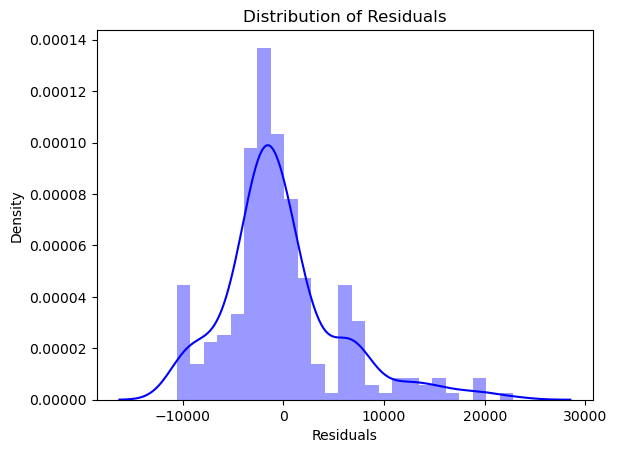

In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

df = 'E:/Capstone Project (Reggression Analysis)/insurance.csv'
df = pd.read_csv(df)

# Encode categorical features using LabelEncoder
label_encoder = LabelEncoder()
df['sex'] = label_encoder.fit_transform(df['sex'])
df['smoker'] = label_encoder.fit_transform(df['smoker'])
df['region'] = label_encoder.fit_transform(df['region'])

# Define the feature matrix X and the target vector y
X = df.drop('charges', axis=1)
y = df['charges']

# Scale the numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Fit the Linear Regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Run statsmodels OLS regression to get the summary
X_train_const = sm.add_constant(X_train)  # Adds a constant term to the predictor
model = sm.OLS(y_train, X_train_const)
results = model.fit()

# Print the summary
print(results.summary())

# Predict on the test set and evaluate the model
y_pred = linear_reg.predict(X_test)

# Plot the residuals to check for normality
import seaborn as sns
import matplotlib.pyplot as plt

residuals = y_test - y_pred
sns.distplot(residuals, kde=True, color='blue')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.show()


In [2]:
# Run this cell
print(f'Coefficients: {linear_reg.coef_}')
print(f'Intercept: {linear_reg.intercept_}')
print(f'R^2 score: {linear_reg.score(X, y)}')

AttributeError: 'LinearRegression' object has no attribute 'coef_'

Coefficients: [ 3.61028043e+03 -9.39521400e+00  2.04689296e+03  5.12253132e+02
  9.54291505e+03 -2.99625864e+02]
Intercept: 13315.445192139769
R^2 score: 0.7833463107364534
                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     508.7
Date:                Wed, 24 Jul 2024   Prob (F-statistic):          2.71e-308
Time:                        11:50:06   Log-Likelihood:                -10845.
No. Observations:                1070   AIC:                         2.170e+04
Df Residuals:                    1063   BIC:                         2.174e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err     

C:\Users\bipas\AppData\Local\Temp\ipykernel_6680\2414976333.py:52: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals, kde=True, color='blue')
C:\Users\bipas\anaconda3\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


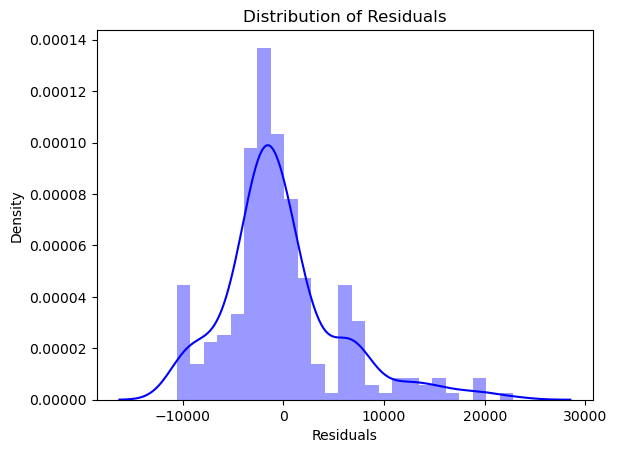

In [4]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

df = 'E:/Capstone Project (Reggression Analysis)/insurance.csv'
df = pd.read_csv(df)

# Encode categorical features using LabelEncoder
label_encoder = LabelEncoder()
df['sex'] = label_encoder.fit_transform(df['sex'])
df['smoker'] = label_encoder.fit_transform(df['smoker'])
df['region'] = label_encoder.fit_transform(df['region'])

# Define the feature matrix X and the target vector y
X = df.drop('charges', axis=1)
y = df['charges']

# Scale the numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Fit the Linear Regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Print the coefficients, intercept, and R^2 score
print(f'Coefficients: {linear_reg.coef_}')
print(f'Intercept: {linear_reg.intercept_}')
print(f'R^2 score: {linear_reg.score(X_test, y_test)}')

# Run statsmodels OLS regression to get the summary
X_train_const = sm.add_constant(X_train)  # Adds a constant term to the predictor
model = sm.OLS(y_train, X_train_const)
results = model.fit()

# Print the summary
print(results.summary())

# Predict on the test set and evaluate the model
y_pred = linear_reg.predict(X_test)

# Plot the residuals to check for normality
residuals = y_test - y_pred
sns.distplot(residuals, kde=True, color='blue')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.show()


##  <mark><span  style= "font-family: Times New Roman">Assumptions: </span> </mark> <a class="anchor" id="Assumptions"></a>

<div class="warning" style='padding:0.1em; background-color:#70A0AF; color:#FFFFFF'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Column: </b></p>
<p style='margin-left:1em;'>
<pre>
Assumptions for Linear Regression:
Lets check the extent upto where the assumptions of Linear Regression is valid:
</pre>
</p>
</span>
</div>

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- We need to perform Ordinary least squares to understand these assumptions. 
- Run the below cell. You need not right any code in the cells that are mentioned "Run the cell"
</pre>
</p>
</span>
</div>

In [55]:
# Run this cell to understand the summary.
import statsmodels.api as sm
X_constant = sm.add_constant(X)
lin_reg = sm.OLS(y,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     798.0
Date:                Tue, 23 Jul 2024   Prob (F-statistic):               0.00
Time:                        14:56:34   Log-Likelihood:                -13551.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1332   BIC:                         2.715e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.205e+04    951.260    -12.670      0.000   -1.39e+04   -1.02e+04
age          257.7350     11.904     21.651      0.000     234.383     281.087
sex         -128.6399    333.361     -0.386      0.700    -782.609     525.329
bmi          322.3642     27.419     11.757      0.000     268.576     376.153
children     474.4111    137.856      3.441      0.001     203.973     744.849
smoker      2.382e+04    412.523     57.750      0.000     2.3e+04    2.46e+04
==============================================================================
Omnibus:                      301.103   Durbin-Watson:                   2.087
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              720.380
Skew:                           1.214   Prob(JB):                    3.73e-157
Kurtosis:                       5.650   Cond. No.                         295.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Coefficients: [ 3.61028043e+03 -9.39521400e+00  2.04689296e+03  5.12253132e+02
  9.54291505e+03 -2.99625864e+02]
Intercept: 13315.445192139769
R^2 score: 0.7833463107364534
                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     668.1
Date:                Wed, 24 Jul 2024   Prob (F-statistic):               0.00
Time:                        11:54:18   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1331   BIC:                         2.715e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err     

C:\Users\bipas\AppData\Local\Temp\ipykernel_6680\339287647.py:49: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals, kde=True, color='blue')
C:\Users\bipas\anaconda3\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


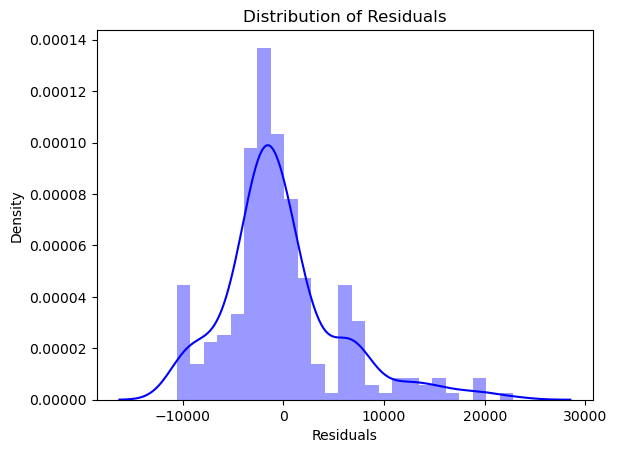

In [5]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

file_path = 'E:/Capstone Project (Reggression Analysis)/insurance.csv'
df = pd.read_csv(file_path)

# Encode categorical features using LabelEncoder
label_encoder = LabelEncoder()
df['sex'] = label_encoder.fit_transform(df['sex'])
df['smoker'] = label_encoder.fit_transform(df['smoker'])
df['region'] = label_encoder.fit_transform(df['region'])

# Define the feature matrix X and the target vector y
X = df.drop('charges', axis=1)
y = df['charges']

# Scale the numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Fit the Linear Regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Print the coefficients, intercept, and R^2 score
print(f'Coefficients: {linear_reg.coef_}')
print(f'Intercept: {linear_reg.intercept_}')
print(f'R^2 score: {linear_reg.score(X_test, y_test)}')

# Perform OLS regression to get the summary
X_constant = sm.add_constant(X_scaled)
lin_reg_ols = sm.OLS(y, X_constant).fit()
print(lin_reg_ols.summary())

# Predict on the test set and evaluate the model
y_pred = linear_reg.predict(X_test)

# Plot the residuals to check for normality
residuals = y_test - y_pred
sns.distplot(residuals, kde=True, color='blue')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.show()


<div class="warning" style='padding:0.1em; background-color:#70A0AF; color:#FFFFFF'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Assumption: </b></p>
<p style='margin-left:1em;'>
<pre>
Assumption-1 : No Autocorrelation.
From the above summary, Note the Durbin Watson value.
Durbin-Watson test is a statistical test that works for finding autocorrelation value. It lies generally between 0-4.
</pre>
</p>
</span>
</div>

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- Input the Durbin watson value and Write an if statement to print:
"Positive Correlation" for value greater than 2
"Zero correlation" for value equal to 2
"Negative Correlation" for value lesser than 2
</pre>
</p>
</span>
</div>

C:\Users\bipas\AppData\Local\Temp\ipykernel_20616\3201384818.py:5: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  acf.show()


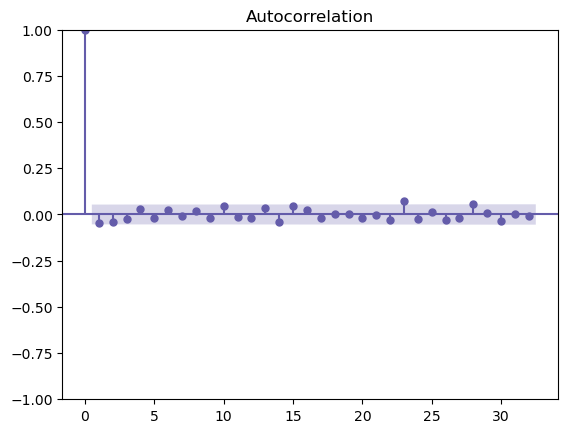

In [56]:
# Run the cell below
# this plot is called autocorrelation plot. you will be working on this later in the course.
import statsmodels.tsa.api as smt
acf = smt.graphics.plot_acf(lin_reg.resid,alpha=0.05)
acf.show()

<div class="warning" style='padding:0.1em; background-color:#70A0AF; color:#FFFFFF'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Assumption: </b></p>
<p style='margin-left:1em;'>
<pre>
Assumption-2 : Normality of Residuals.
From the above summary, Note the Jarque bera value.
Normality is an assumption for many statistical tests. Jarque-bera value is a test for checking normality. 
We are performing this here to check the normality for the different of actual and predicted values.
</pre>
</p>
</span>
</div>

In [57]:
# Run the below cell
from scipy import stats
print(stats.jarque_bera(lin_reg.resid))

SignificanceResult(statistic=720.3800687692875, pvalue=3.727825975795568e-157)


<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- Input the Jarque bera value and p-value as 0.05 and Write an if statement to print:
"Normal distribution" for value greater than p-value
"Non-normal distribution" for value lesser than p-value
</pre>
</p>
</span>
</div>

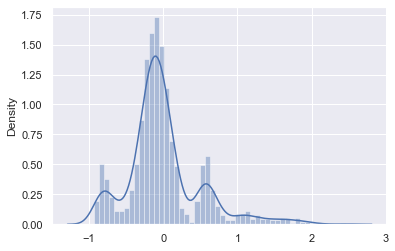

In [212]:
# Validate your above answer by running the cell
import seaborn as sns
sns.distplot(lin_reg.resid)
plt.show()

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     668.1
Date:                Wed, 24 Jul 2024   Prob (F-statistic):               0.00
Time:                        12:06:44   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1331   BIC:                         2.715e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.327e+04    165.662     80.106      0.0

C:\Users\bipas\AppData\Local\Temp\ipykernel_6680\682715599.py:57: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(lin_reg_ols.resid, kde=True, color='blue')
C:\Users\bipas\anaconda3\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


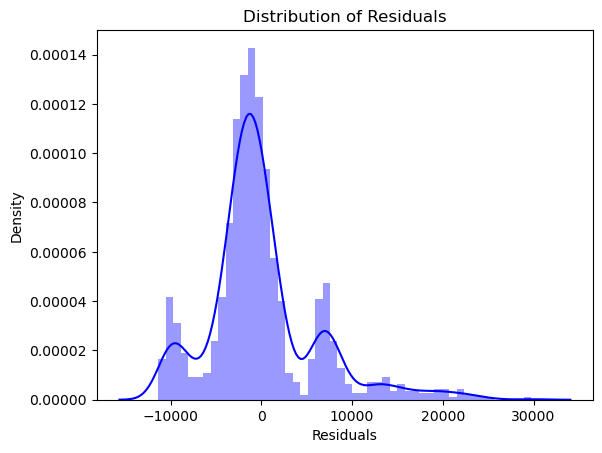

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import jarque_bera
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd

file_path = 'E:/Capstone Project (Reggression Analysis)/insurance.csv'
df = pd.read_csv(file_path)

# Encode categorical features using LabelEncoder
label_encoder = LabelEncoder()
df['sex'] = label_encoder.fit_transform(df['sex'])
df['smoker'] = label_encoder.fit_transform(df['smoker'])
df['region'] = label_encoder.fit_transform(df['region'])

# Define the feature matrix X and the target vector y
X = df.drop('charges', axis=1)
y = df['charges']

# Scale the numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Fit the Linear Regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Perform OLS regression to get the summary
X_constant = sm.add_constant(X_scaled)
lin_reg_ols = sm.OLS(y, X_constant).fit()
print(lin_reg_ols.summary())

# Calculate the Jarque-Bera test statistic and p-value
jb_stat, p_value = jarque_bera(lin_reg_ols.resid)

# Define the significance level
alpha = 0.05

# Print the results
print(f'Jarque-Bera test statistic: {jb_stat}')
print(f'p-value: {p_value}')

# Check if the residuals follow a normal distribution
if p_value > alpha:
    print("Normal distribution")
else:
    print("Non-normal distribution")

# Validate by plotting the residuals distribution
sns.distplot(lin_reg_ols.resid, kde=True, color='blue')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.show()


<div class="warning" style='padding:0.1em; background-color:#70A0AF; color:#FFFFFF'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Assumption: </b></p>
<p style='margin-left:1em;'>
<pre>
Asssumption 3 - Linearity of residuals
Run the below cell to check the Linearity in the model
</pre>
</p>
</span>
</div>

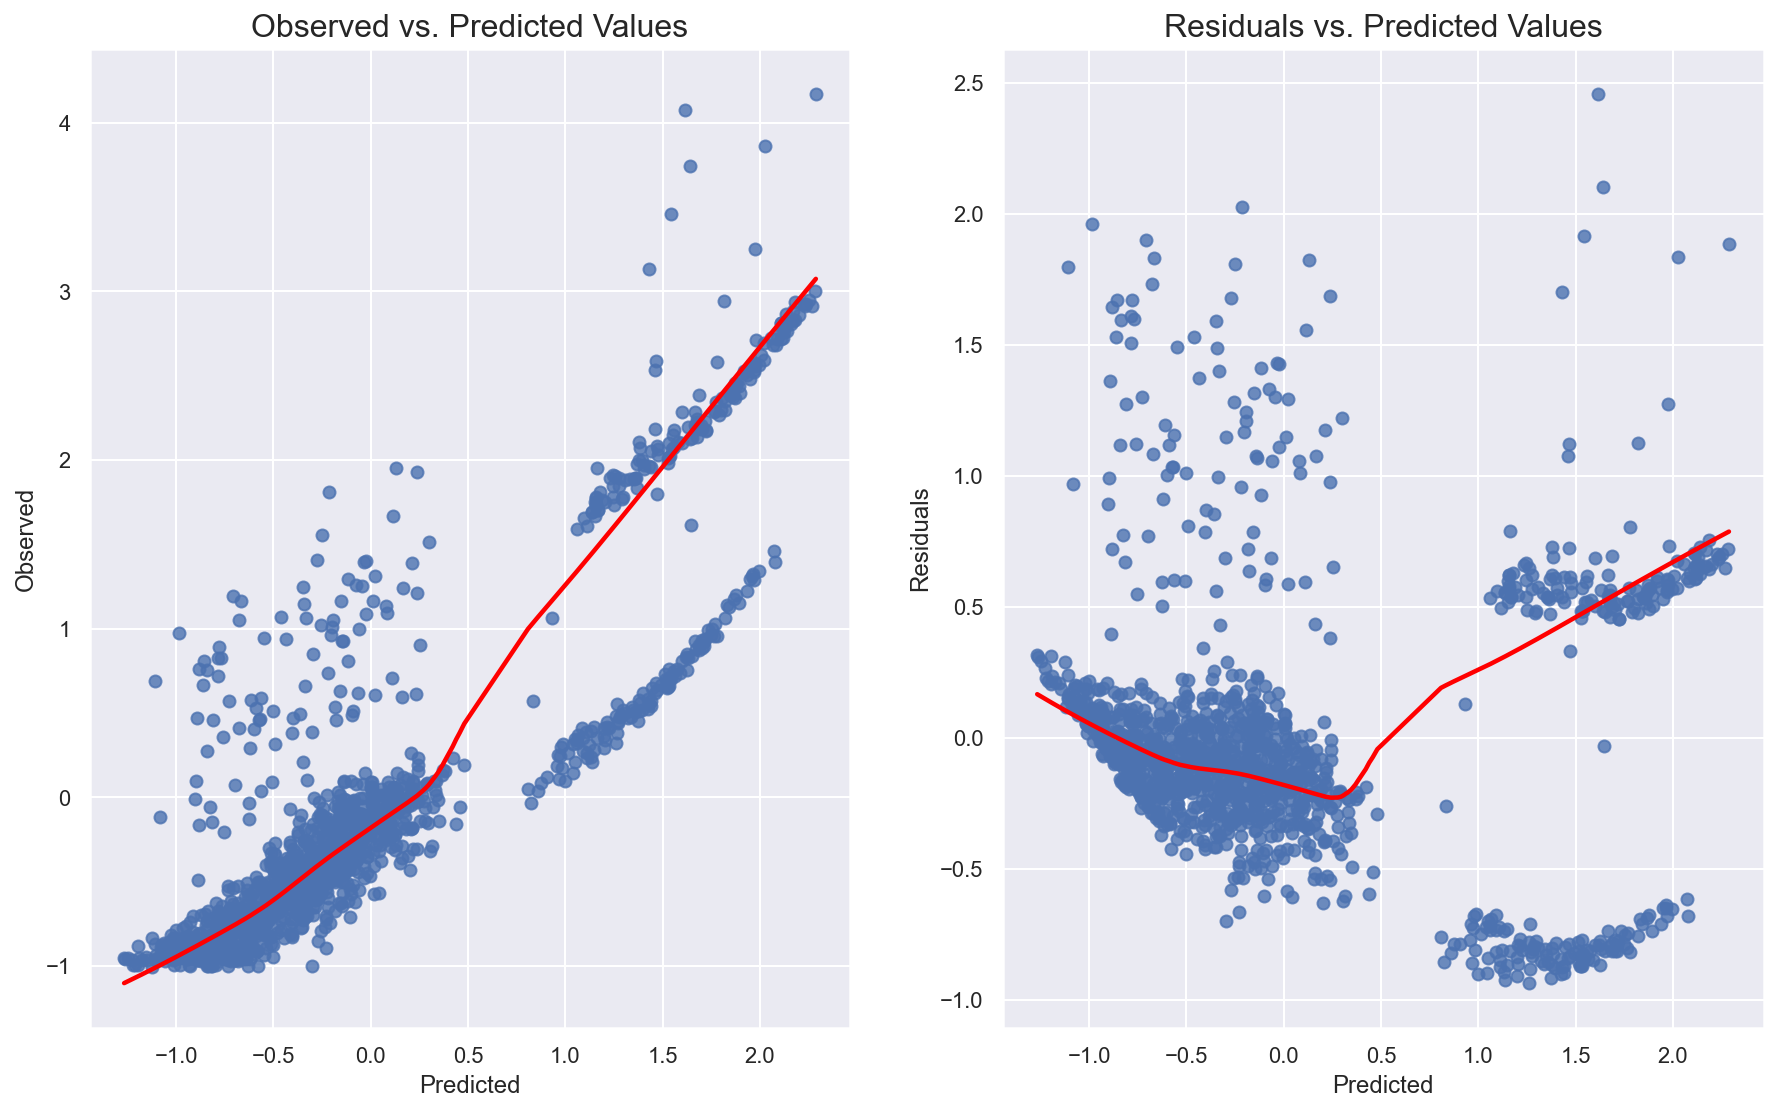

In [213]:
%matplotlib inline
%config InlineBackend.figure_format ='retina'
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

# function to test the linearity. Input the model(Linear Regression and the output)
def linearity_test(model, y):
    '''
    Function for visually inspecting the assumption of linearity in a linear regression model.
    It plots observed vs. predicted values and residuals vs. predicted values.
    
    Args:
    * model - fitted OLS model from statsmodels
    * y - observed values
    '''
    # Finding the predictions from the model
    fit_values = model.predict()
    #Residuals 
    resids = model.resid

    fig, ax = plt.subplots(1,2)
    
    # Plotting a regression plot for the above found values
    sns.regplot(x=fit_values, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
    ax[0].set(xlabel='Predicted', ylabel='Observed')

    sns.regplot(x=fit_values, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
    ax[1].set(xlabel='Predicted', ylabel='Residuals')
    
linearity_test(lin_reg, y)  

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- Run the below cell to perform Rainbow test. 
Rainbow test is performed to test linearity. Even though there is no good linearity, it can be used to achieve the linearity from a subsample data.
</pre>
</p>
</span>
</div>

In [214]:
import statsmodels.api as sm
sm.stats.diagnostic.linear_rainbow(res=lin_reg, frac=0.5)

(1.1339499149847379, 0.05261918323237715)

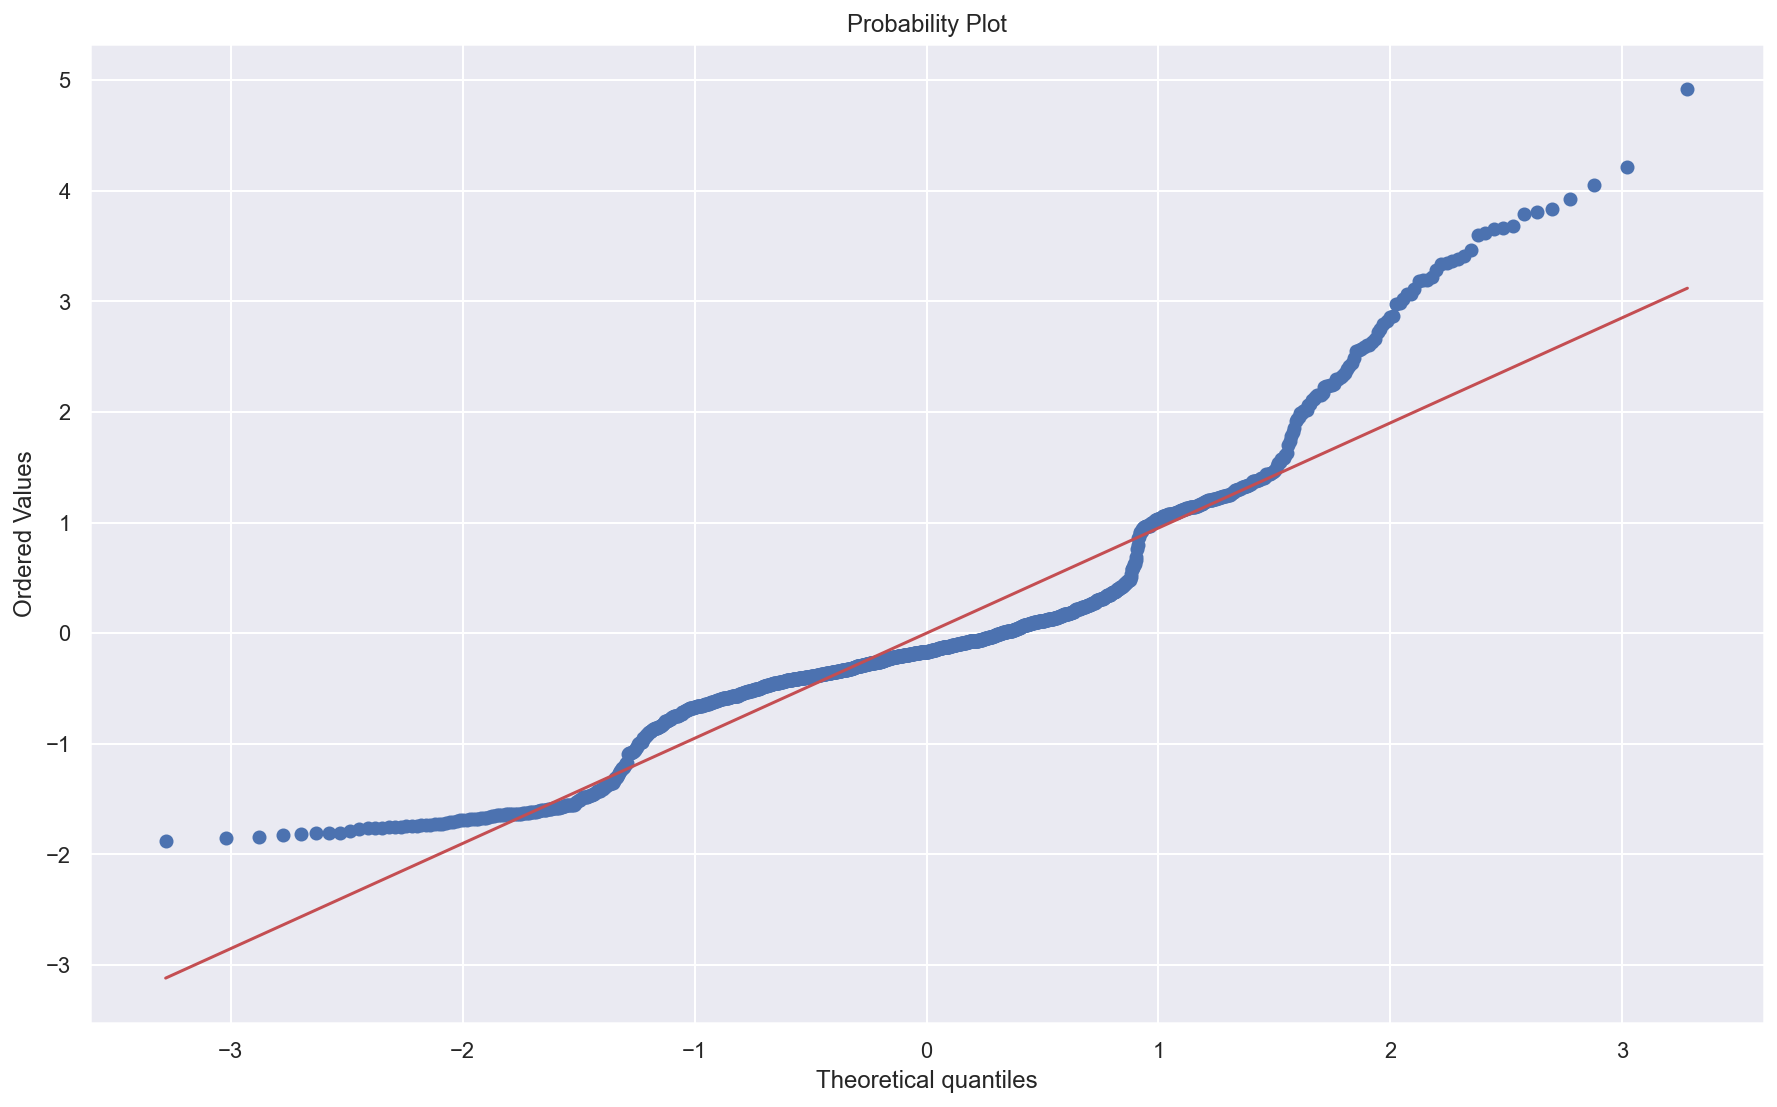

In [215]:
# Run the below cell and understand the residual distribution
import scipy.stats as stats
import pylab
from statsmodels.graphics.gofplots import ProbPlot
# We are plotting studentized residuals
st_residual = lin_reg.get_influence().resid_studentized_internal
stats.probplot(st_residual, dist="norm", plot = pylab)
plt.show()

In [216]:
lin_reg.resid.mean()
# As the value is very much close it zero .We can say linearity is present.

1.0233468283035916e-15

<div class="warning" style='padding:0.1em; background-color:#70A0AF; color:#FFFFFF'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Assumption: </b></p>
<p style='margin-left:1em;'>
<pre>
Assumption 4 - Homoscedasticity_test(using goldfeld test) OR (Beusch-Wagon Test)
Run the below cell to check the homoscedasticity in the model
</pre>
</p>
</span>
</div>

**We are plotting the same as above plots, but for checking homoscedasticity (uniform variance)**

[Text(0.5, 0, 'Fitted Values'), Text(0, 0.5, 'sqrt(abs(Residuals))')]

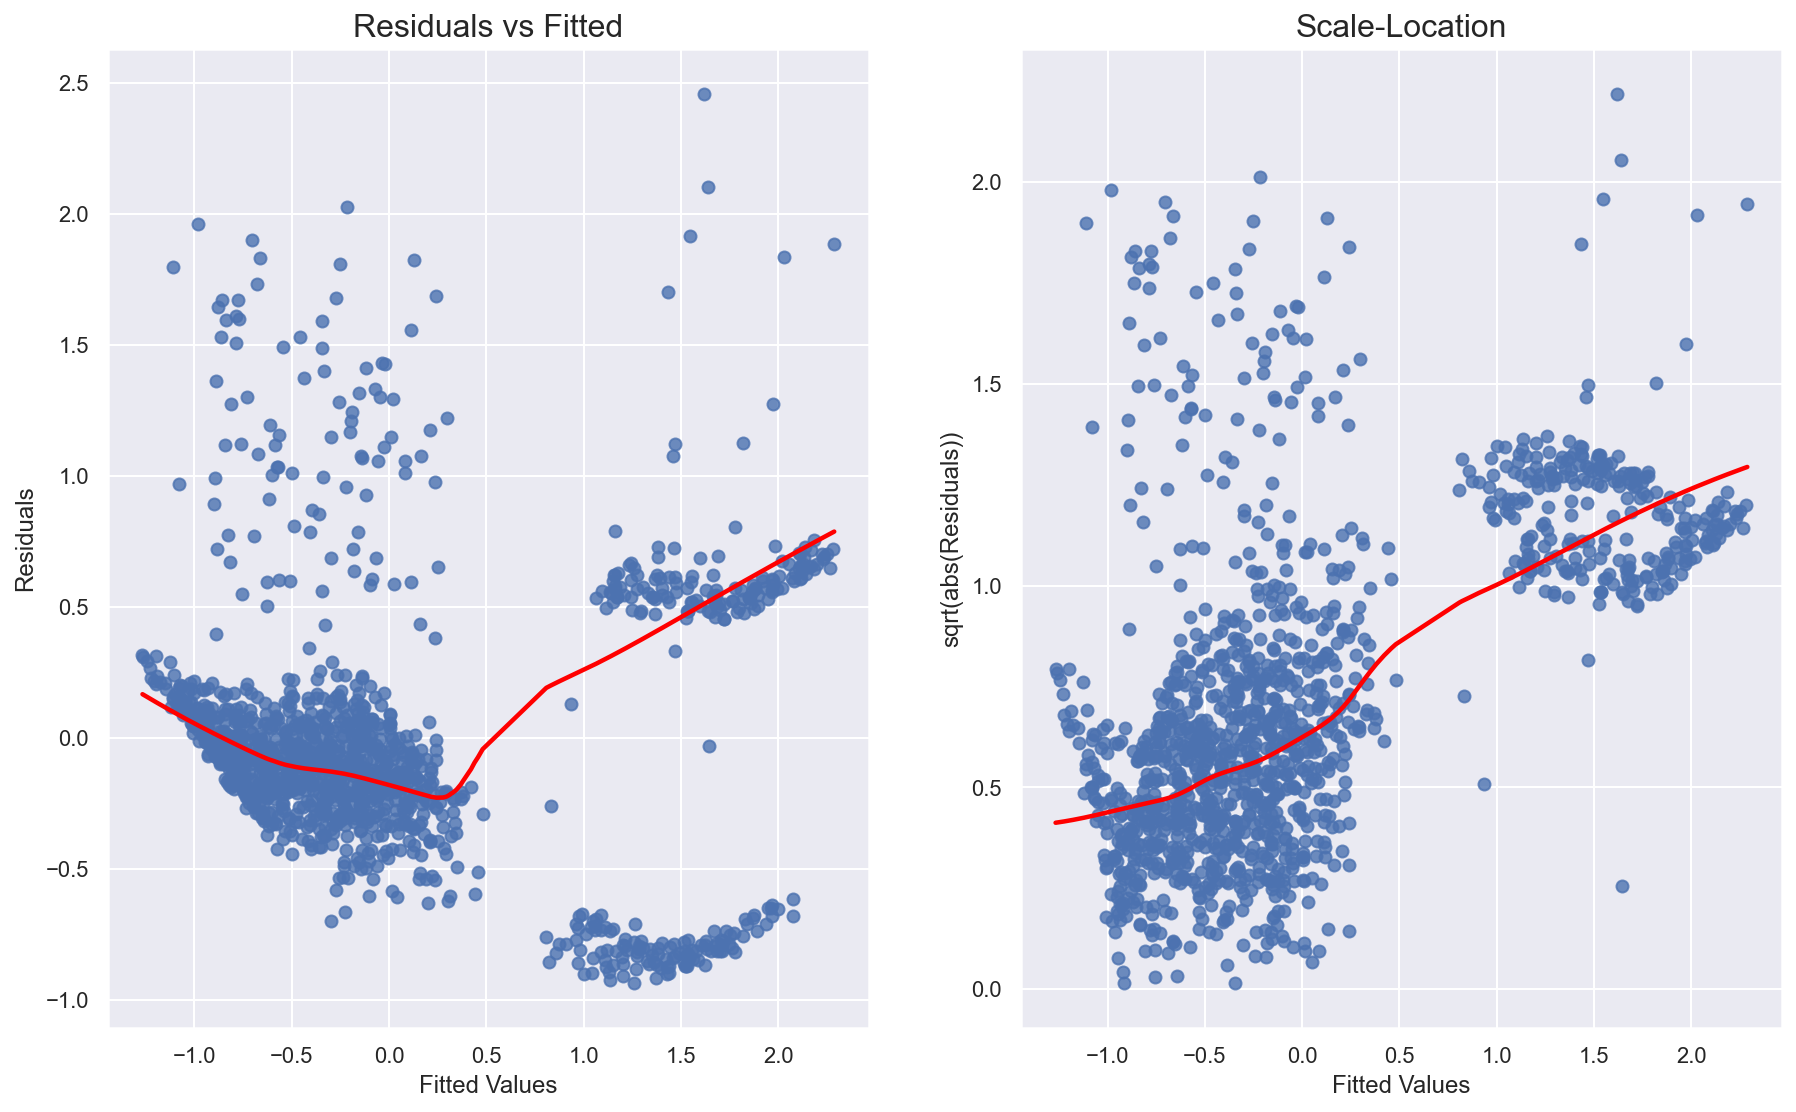

In [217]:
from statsmodels.compat import lzip
from statsmodels.compat import lzip

model = lin_reg
resids = model.resid
fit_values = model.predict()
resids_standardized = model.get_influence().resid_studentized_internal
fig, ax = plt.subplots(1,2)

# Regression plots for residual values and predicted values
sns.regplot(x=fit_values, y=resids, lowess=True, ax=ax[0], line_kws={'color': 'red'})
ax[0].set_title('Residuals vs Fitted', fontsize=16)
ax[0].set(xlabel='Fitted Values', ylabel='Residuals')

# Regression plots for scaled residuals and predicted values
sns.regplot(x=fit_values, y=np.sqrt(np.abs(resids_standardized)), lowess=True, ax=ax[1], line_kws={'color': 'red'})
ax[1].set_title('Scale-Location', fontsize=16)
ax[1].set(xlabel='Fitted Values', ylabel='sqrt(abs(Residuals))')

In [218]:
# Goldfeld quandt test is used to check the homoscedasticity in regression analysis
# Run the below cell
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(model.resid, model.model.exog)
lzip(name, test)
# WE fail to reject the null hypothesis which is Homoscedasticity is present and we can continue with the original regression

[('F statistic', 0.9566557936681559), ('p-value', 0.7155988668351111)]

In [219]:
print('p-value greater than alpha hence we failed to reject null hypothesis. Hence, It is homoscedastic in nature.')

p-value greater than alpha hence we failed to reject null hypothesis. Hence, It is homoscedastic in nature.


<div class="warning" style='padding:0.1em; background-color:#70A0AF; color:#FFFFFF'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Assumption: </b></p>
<p style='margin-left:1em;'>
<pre>
Assumption 5- NO MULTI COLLINEARITY
Run the below cell to check the Multicollinearity in the model
We use Variation inflation factors. The name itself says to determine the factors that inflate the variance if any additional variable is added to the regression.
</pre>
</p>
</span>
</div>

In [220]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# We added this constant in summary
# The constant term is checked with every feature in the data and the measure is calculated. 
# If there is a very huge value for vif, then there might be chance of high collinearity 
# Here, there are no such high ranges, so it is fine to assume no multicollinearity and proceed with original regression.
vif = [variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]
pd.set_option("display.Max_columns",None)
pd.DataFrame({'vif': vif[1:]}, index=X.columns).T

,age,sex,bmi,children,smoker,region
vif,1.015394,1.008889,1.040608,1.002482,1.006466,1.025966


### By now, we have completed checking the assumptions for Linear Regression. 
### Now, we are ready to build the model with train and test data and check the working of the model.

In [221]:
# As the data is split into train data and test data, Lets start the model
# Step-1: Create an instance of the Linear Regression, use fit() to fit the model to the input data
# Step-2: USe predict() and predict the output for test data

##  <mark><span  style= "font-family: Times New Roman">Evaluation metrics </span> </mark> <a class="anchor" id="Evaluation_metrics"></a>

In [223]:
# Calculate the metrics mean_absolute_error and mean_squared_error

In [226]:
# Calculate the metrics r2_score and adjusted_r2_score for both train and test data

In [3]:
# Prediction on training Data


In [4]:
# R square in train data


In [5]:
# Adjusted R square in train data


In [6]:
# Prediction on test Data


In [7]:
# R square in test data


In [8]:
# Adjusted R square in train data


<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
- What do you infer from both r squared value and adjusted r squared value?
</pre>
</p>
</span>
</div>

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
import statsmodels.api as sm

file_path = 'E:/Capstone Project (Reggression Analysis)/insurance.csv'
df = pd.read_csv(file_path)

# Encode categorical features using LabelEncoder
label_encoder = LabelEncoder()
df['sex'] = label_encoder.fit_transform(df['sex'])
df['smoker'] = label_encoder.fit_transform(df['smoker'])
df['region'] = label_encoder.fit_transform(df['region'])

# Define the feature matrix X and the target vector y
X = df.drop('charges', axis=1)
y = df['charges']

# Scale the numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Fit the Linear Regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Calculate R^2 value
r_squared = linear_reg.score(X_test, y_test)

# Perform OLS regression to get the summary
X_constant = sm.add_constant(X_scaled)
lin_reg_ols = sm.OLS(y, X_constant).fit()

# Calculate adjusted R^2 value
adj_r_squared = lin_reg_ols.rsquared_adj

# Print the results
print(f'R^2 value: {r_squared}')
print(f'Adjusted R^2 value: {adj_r_squared}')


R^2 value: 0.7833463107364534
Adjusted R^2 value: 0.7496135538263885


## <mark><span  style= "font-family: Times New Roman">Hyperparameter Tuning (Optional) </span> </mark> <a class="anchor" id="Hyperparameter_Tuning"></a>

In [ ]:
# Hyperparameters are the parameters of the model working inside an algorithm to improve model's accuracy. 
# The below listed are hyperparameters of Linear Regression using get_params() function. 
# We are then performing the Linear Regression with several combinations using GridSearchCV.
# GridSearchCV takes the combinations and the evaluates it as a grid to identify the best performed set.

In [148]:
from sklearn.model_selection import GridSearchCV

In [235]:
LinearRegression().get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [245]:
# We will use either Lasso or Ridge Regression to regularize the data, reducing the overfitting degree.
from sklearn.linear_model import Ridge
from sklearn.model_selection import RepeatedKFold
model = Ridge()
# We are using cross validation to reduced the biased values. 
cv = RepeatedKFold(n_splits=10,n_repeats=3,random_state=1)
space=dict()
space['solver'] = ['svd','cholesky','lsqr','sag']
space['alpha'] = [0.01,0.1,1,10]
space['fit_intercept'] = ['True','False']

# model name, space dictionary is given to analyze the combinations 
# Get the metrics list using this function -  sklearn.metrics.get_scorer_names()
# fianlly, cross validation data is given. 
search = GridSearchCV(model,space,scoring='neg_mean_squared_error',cv=cv)
result = search.fit(X, y)
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: -0.25222796505913814
Best Hyperparameters: {'alpha': 1, 'fit_intercept': 'True', 'solver': 'sag'}


In [ ]:
# The above code and explanation is given for reference. If you'd like to perform Hyperparameter tuning, Do it using Lasso Regression model. 

## <mark><span  style= "font-family: Times New Roman">Build a predictive system </span> </mark> <a class="anchor" id="Build"></a>

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<p style='margin-top:1em; text-align:left'>
<b># Question: </b></p>
<p style='margin-left:1em;'>
<pre>
Give the input data to the model - ((31,1,25.74,0,1,0)) and 
The above data has to be standardized so find (x_new = x_old-mean/std)
You need to reshape the data. So, use reshape(1,-1) and predict the price
You will get the standardized data, shift it to the usual price using x_old = x_new*std+mean
</pre>
</p>
</span>
</div>

In [13]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

file_path = 'E:/Capstone Project (Reggression Analysis)/insurance.csv'
df = pd.read_csv(file_path)

# Encode categorical features using LabelEncoder
label_encoder = LabelEncoder()
df['sex'] = label_encoder.fit_transform(df['sex'])
df['smoker'] = label_encoder.fit_transform(df['smoker'])
df['region'] = label_encoder.fit_transform(df['region'])

# Define the feature matrix X and the target vector y
X = df.drop('charges', axis=1)
y = df['charges']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit the Linear Regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)

# New input data
input_data = np.array([[31, 1, 25.74, 0, 1, 0]])

# Standardize the new input data
input_data_scaled = scaler.transform(input_data)

# Reshape the data
input_data_scaled = input_data_scaled.reshape(1, -1)

# Predict the standardized price
predicted_standardized_price = linear_reg.predict(input_data_scaled)

# Calculate mean and std of the target variable from training data
y_mean = y_train.mean()
y_std = y_train.std()

# Transform the standardized prediction back to the usual price
predicted_price = predicted_standardized_price * y_std + y_mean

print(f'Standardized input data: {input_data_scaled}')
print(f'Predicted standardized price: {predicted_standardized_price}')
print(f'Predicted usual price: {predicted_price}')


Standardized input data: [[-0.59406998  0.97598911 -0.79800489 -0.91119211  1.96561348 -1.35325561]]
Predicted standardized price: [28294.17982329]
Predicted usual price: [3.40095545e+08]


C:\Users\bipas\anaconda3\New folder\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# <div class="alert alert-block alert-success"><span  style= "font-family: Times New Roman"><p style="text-align: center;"> Happy Learning!!! </p> </span> </div>